In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

## 1. Importing Data

In [2]:
raw_data = pd.read_csv('fraud_oracle.csv')
raw_data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
raw_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
raw_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


## 2. Outlier Removal and Feature Selection

### Remove Outliers

In [6]:
# Remove Outlier for age is there is entries for Age = 0

raw_data = raw_data[raw_data['Age'] != 0]
raw_data.reset_index(inplace=True)
raw_data.drop("index", axis=1, inplace=True)

In [7]:
raw_data['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15100 non-null  object
 1   WeekOfMonth           15100 non-null  int64 
 2   DayOfWeek             15100 non-null  object
 3   Make                  15100 non-null  object
 4   AccidentArea          15100 non-null  object
 5   DayOfWeekClaimed      15100 non-null  object
 6   MonthClaimed          15100 non-null  object
 7   WeekOfMonthClaimed    15100 non-null  int64 
 8   Sex                   15100 non-null  object
 9   MaritalStatus         15100 non-null  object
 10  Age                   15100 non-null  int64 
 11  Fault                 15100 non-null  object
 12  PolicyType            15100 non-null  object
 13  VehicleCategory       15100 non-null  object
 14  VehiclePrice          15100 non-null  object
 15  FraudFound_P          15100 non-null

### Feature Selection using f_classif and mutual_info_classif

In [9]:
raw_data['RepNumber'] = raw_data['RepNumber'].astype(str)
raw_data['WeekOfMonth'] = raw_data['WeekOfMonth'].astype(str)
raw_data['WeekOfMonthClaimed'] = raw_data['WeekOfMonthClaimed'].astype(str)

In [10]:
def split_columns_temp(df):
    cat_lst = []
    num_lst = []
    for name in df.columns:
        if name in ["FraudFound_P", "PolicyNumber","Days_Policy_Accident","PolicyType"]:
            continue
        if df[name].dtype != 'object':
            num_lst.append(name)
        else:
            cat_lst.append(name)

    return cat_lst, num_lst

In [11]:
categorical_lst, num_lst = split_columns_temp(raw_data)
print("Categorical Variables: ",categorical_lst)
print("Numerical Variables:",num_lst)

Categorical Variables:  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Variables: ['Age', 'Deductible', 'DriverRating', 'Year']


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X, y = raw_data[num_lst], raw_data['FraudFound_P']

# Take top 50% for each classifier
proportion = 0.5
k = int(len(num_lst) * proportion)

# Populate features list
numerical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [f_classif, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    numerical_features.extend(new_features)

# Retain unique elements
numerical_features = list(set(numerical_features))
numerical_features

f_classif ['Age', 'Deductible']
mutual_info_classif ['Age', 'Deductible']


['Deductible', 'Age']

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Encode categorical variables
label_encoder = LabelEncoder()
df = raw_data.copy()
X, y = df[categorical_lst], df['FraudFound_P']
for var in categorical_lst:
    X[var] = label_encoder.fit_transform(raw_data[var])

# We take top 50% for each classifier
proportion = 0.5
k = int(len(categorical_lst) * proportion)

# Populate features list
categorical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [chi2, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    categorical_features.extend(new_features)

# Retain unique elements
categorical_features = list(set(categorical_features))
categorical_features

/var/folders/c9/9wp1fdjd405gx2sjqgqjgbwr0000gn/T/ipykernel_22142/3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
/var/folders/c9/9wp1fdjd405gx2sjqgqjgbwr0000gn/T/ipykernel_22142/3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
/var/folders/c9/9wp1fdjd405gx2sjqgqjgbwr0000gn/T/ipykernel_22142/3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

chi2 ['DayOfWeek', 'Make', 'MonthClaimed', 'Fault', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'BasePolicy']
mutual_info_classif ['DayOfWeek', 'AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'Days_Policy_Claim', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim', 'BasePolicy']


['Sex',
 'NumberOfSuppliments',
 'AgentType',
 'AccidentArea',
 'PoliceReportFiled',
 'AgeOfPolicyHolder',
 'VehiclePrice',
 'MonthClaimed',
 'PastNumberOfClaims',
 'DayOfWeek',
 'WeekOfMonthClaimed',
 'BasePolicy',
 'Days_Policy_Claim',
 'VehicleCategory',
 'AgeOfVehicle',
 'AddressChange_Claim',
 'Make',
 'Fault']

In [14]:
final_features = []

In [15]:
final_features.extend(numerical_features)
final_features.extend(categorical_features)
final_features.append('FraudFound_P')

In [16]:
final_features

['Deductible',
 'Age',
 'Sex',
 'NumberOfSuppliments',
 'AgentType',
 'AccidentArea',
 'PoliceReportFiled',
 'AgeOfPolicyHolder',
 'VehiclePrice',
 'MonthClaimed',
 'PastNumberOfClaims',
 'DayOfWeek',
 'WeekOfMonthClaimed',
 'BasePolicy',
 'Days_Policy_Claim',
 'VehicleCategory',
 'AgeOfVehicle',
 'AddressChange_Claim',
 'Make',
 'Fault',
 'FraudFound_P']

### Selected Features

In [17]:
final_df = raw_data[final_features].copy()

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Deductible           15100 non-null  int64 
 1   Age                  15100 non-null  int64 
 2   Sex                  15100 non-null  object
 3   NumberOfSuppliments  15100 non-null  object
 4   AgentType            15100 non-null  object
 5   AccidentArea         15100 non-null  object
 6   PoliceReportFiled    15100 non-null  object
 7   AgeOfPolicyHolder    15100 non-null  object
 8   VehiclePrice         15100 non-null  object
 9   MonthClaimed         15100 non-null  object
 10  PastNumberOfClaims   15100 non-null  object
 11  DayOfWeek            15100 non-null  object
 12  WeekOfMonthClaimed   15100 non-null  object
 13  BasePolicy           15100 non-null  object
 14  Days_Policy_Claim    15100 non-null  object
 15  VehicleCategory      15100 non-null  object
 16  AgeO

#### Binary Categorical Variables

In [19]:
for column in categorical_features:
    if len(final_df[column].unique()) == 2:
        print(column, final_df[column].unique())
        print()

Sex ['Female' 'Male']

AgentType ['External' 'Internal']

AccidentArea ['Urban' 'Rural']

PoliceReportFiled ['No' 'Yes']

Fault ['Policy Holder' 'Third Party']



#### Multi-categorical Variables

In [20]:
for column in categorical_features:
    if len(final_df[column].unique()) > 2:
        print(column, final_df[column].unique())
        print()

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']

AgeOfPolicyHolder ['26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40'
 'over 65' '18 to 20']

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

WeekOfMonthClaimed ['1' '4' '2' '3' '5']

BasePolicy ['Liability' 'Collision' 'All Perils']

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15']

VehicleCategory ['Sport' 'Utility' 'Sedan']

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years'
 'new']

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 

#### Ordinal Features

In [21]:
ordinal_features = ['AgeOfPolicyHolder','PastNumberOfClaims',
                    'VehiclePrice','NumberOfSuppliments','Days_Policy_Claim']

## 3. Feature Engineering and Data Preprocessing

### Helper Functions

In [22]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [23]:
def convert_label(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [24]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [25]:
def scaler(df,columns):
    age = []
    deductible = []
    scaler = MinMaxScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        age.append(row[0])
        deductible.append(row[1])
    df['Age'] = age
    df['Deductible'] = deductible
    return df

In [26]:
def convert_ordinal(df, name, mapping):
    encoder = LabelEncoder()
    encoder.classes_ = [str(category) for category, _ in sorted(mapping.items(), key=lambda x: x[1])]
    df[name] = encoder.fit_transform(df[name])
    return df

In [27]:
def count_encoder(df, columns):
    for name in columns:
        encoder = ce.CountEncoder(cols=name, normalize=True)
        df[name] = encoder.fit_transform(df[name])
    return df

In [28]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(final_df)

In [29]:
multicat_features = [feature for feature in categorical_lst if feature not in ordinal_features]
multicat_features.remove('MonthClaimed')
multicat_features.remove('Make')

print("Binary Variable:",binary_lst)
print("Multi-Categorical Variable:",multicat_features)
print("Numerical:",num_lst)
print("Ordinal:", ordinal_features)
print("CountEncoder", ['Make','MonthClaimed'])

Binary Variable: ['Sex', 'AgentType', 'AccidentArea', 'PoliceReportFiled', 'Fault']
Multi-Categorical Variable: ['DayOfWeek', 'WeekOfMonthClaimed', 'BasePolicy', 'VehicleCategory', 'AgeOfVehicle', 'AddressChange_Claim']
Numerical: ['Deductible', 'Age', 'FraudFound_P']
Ordinal: ['AgeOfPolicyHolder', 'PastNumberOfClaims', 'VehiclePrice', 'NumberOfSuppliments', 'Days_Policy_Claim']
CountEncoder ['Make', 'MonthClaimed']


### Data Encoding

#### Label Encoding for Binary Features

In [30]:
convert_label(final_df, binary_lst)

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,DayOfWeek,WeekOfMonthClaimed,BasePolicy,Days_Policy_Claim,VehicleCategory,AgeOfVehicle,AddressChange_Claim,Make,Fault,FraudFound_P
0,300,21,0,none,0,1,0,26 to 30,more than 69000,Jan,...,Wednesday,1,Liability,more than 30,Sport,3 years,1 year,Honda,0,0
1,400,34,1,none,0,1,1,31 to 35,more than 69000,Jan,...,Wednesday,4,Collision,more than 30,Sport,6 years,no change,Honda,0,0
2,400,47,1,none,0,1,0,41 to 50,more than 69000,Nov,...,Friday,2,Collision,more than 30,Sport,7 years,no change,Honda,0,0
3,400,65,1,more than 5,0,0,1,51 to 65,20000 to 29000,Jul,...,Saturday,1,Liability,more than 30,Sport,more than 7,no change,Toyota,1,0
4,400,27,0,none,0,1,0,31 to 35,more than 69000,Feb,...,Monday,2,Collision,more than 30,Sport,5 years,no change,Honda,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,400,35,1,none,0,1,0,31 to 35,20000 to 29000,Nov,...,Friday,5,Collision,more than 30,Sedan,6 years,no change,Toyota,0,1
15096,400,30,1,more than 5,0,1,0,31 to 35,30000 to 39000,Dec,...,Thursday,1,Liability,more than 30,Sport,6 years,no change,Pontiac,0,0
15097,400,24,1,1 to 2,0,0,0,26 to 30,20000 to 29000,Dec,...,Thursday,1,Collision,more than 30,Sedan,5 years,no change,Toyota,0,1
15098,400,34,0,more than 5,0,1,0,31 to 35,20000 to 29000,Dec,...,Monday,2,All Perils,more than 30,Sedan,2 years,no change,Toyota,1,0


#### One Hot Encoding

In [31]:
oneHotEncode(final_df,multicat_features)

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
0,300,21,0,none,0,1,0,26 to 30,more than 69000,Jan,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,400,34,1,none,0,1,1,31 to 35,more than 69000,Jan,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,400,47,1,none,0,1,0,41 to 50,more than 69000,Nov,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,400,65,1,more than 5,0,0,1,51 to 65,20000 to 29000,Jul,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,400,27,0,none,0,1,0,31 to 35,more than 69000,Feb,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,400,35,1,none,0,1,0,31 to 35,20000 to 29000,Nov,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15096,400,30,1,more than 5,0,1,0,31 to 35,30000 to 39000,Dec,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15097,400,24,1,1 to 2,0,0,0,26 to 30,20000 to 29000,Dec,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15098,400,34,0,more than 5,0,1,0,31 to 35,20000 to 29000,Dec,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Scaling of Numberical Features

In [32]:
# We do not want to scale the label
scaler(final_df, ['Age','Deductible'])

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
0,0.00,0.078125,0,none,0,1,0,26 to 30,more than 69000,Jan,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.25,0.281250,1,none,0,1,1,31 to 35,more than 69000,Jan,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,1,none,0,1,0,41 to 50,more than 69000,Nov,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,1,more than 5,0,0,1,51 to 65,20000 to 29000,Jul,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,none,0,1,0,31 to 35,more than 69000,Feb,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.25,0.296875,1,none,0,1,0,31 to 35,20000 to 29000,Nov,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15096,0.25,0.218750,1,more than 5,0,1,0,31 to 35,30000 to 39000,Dec,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15097,0.25,0.125000,1,1 to 2,0,0,0,26 to 30,20000 to 29000,Dec,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15098,0.25,0.281250,0,more than 5,0,1,0,31 to 35,20000 to 29000,Dec,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Label Encoding for Ordinal Features

In [33]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [34]:
age_policy_holder_mapping = {'26 to 30': 2, '31 to 35':3, '41 to 50': 5, '51 to 65': 6, '21 to 25': 1, '36 to 40':4, 'over 65': 7, '18 to 20': 0}
past_number_of_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
vehicle_price_mapping = {'more than 69000': 5, '20000 to 29000': 1, '30000 to 39000': 2, 'less than 20000': 0, '40000 to 59000': 3, '60000 to 69000': 4}
NoS_mapping = {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3}
DPC_mapping = {'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3}

mapper_lst = [age_policy_holder_mapping, past_number_of_claims_mapping, vehicle_price_mapping, NoS_mapping,DPC_mapping]

mapper_lst

[{'26 to 30': 2,
  '31 to 35': 3,
  '41 to 50': 5,
  '51 to 65': 6,
  '21 to 25': 1,
  '36 to 40': 4,
  'over 65': 7,
  '18 to 20': 0},
 {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
 {'more than 69000': 5,
  '20000 to 29000': 1,
  '30000 to 39000': 2,
  'less than 20000': 0,
  '40000 to 59000': 3,
  '60000 to 69000': 4},
 {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
 {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}]

In [35]:
for i in range(0,5):
    convert_ordinal(final_df, ordinal_features[i], mapper_lst[i]);

#### Frequency Encoding for Categorical Variables with more than 10 categories

In [36]:
count_encoder(final_df, ['Make','MonthClaimed'])

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
0,0.00,0.078125,0,3,0,1,0,2,5,0.091060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.25,0.281250,1,3,0,1,1,3,5,0.091060,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,1,3,0,1,0,5,5,0.084503,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,1,2,0,0,1,6,0,0.080530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,3,0,1,0,3,5,0.082119,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.25,0.296875,1,3,0,1,0,3,0,0.084503,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15096,0.25,0.218750,1,2,0,1,0,3,1,0.075430,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15097,0.25,0.125000,1,0,0,0,0,2,0,0.075430,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15098,0.25,0.281250,0,2,0,1,0,3,0,0.075430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Deductible                          15100 non-null  float64
 1   Age                                 15100 non-null  float64
 2   Sex                                 15100 non-null  int64  
 3   NumberOfSuppliments                 15100 non-null  int64  
 4   AgentType                           15100 non-null  int64  
 5   AccidentArea                        15100 non-null  int64  
 6   PoliceReportFiled                   15100 non-null  int64  
 7   AgeOfPolicyHolder                   15100 non-null  int64  
 8   VehiclePrice                        15100 non-null  int64  
 9   MonthClaimed                        15100 non-null  float64
 10  PastNumberOfClaims                  15100 non-null  int64  
 11  DayOfWeek                           15100

In [38]:
final_df.head()

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
0,0.00,0.078125,0,3,0,1,0,2,5,0.091060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.25,0.281250,1,3,0,1,1,3,5,0.091060,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,1,3,0,1,0,5,5,0.084503,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,1,2,0,0,1,6,0,0.080530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,3,0,1,0,3,5,0.082119,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Dropping Unnecessary Columns

In [39]:
final_df.drop(multicat_features, axis=1, inplace=True)

In [40]:
final_df.reset_index(inplace = True)
final_df.drop('index', axis=1, inplace=True)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Deductible                          15100 non-null  float64
 1   Age                                 15100 non-null  float64
 2   Sex                                 15100 non-null  int64  
 3   NumberOfSuppliments                 15100 non-null  int64  
 4   AgentType                           15100 non-null  int64  
 5   AccidentArea                        15100 non-null  int64  
 6   PoliceReportFiled                   15100 non-null  int64  
 7   AgeOfPolicyHolder                   15100 non-null  int64  
 8   VehiclePrice                        15100 non-null  int64  
 9   MonthClaimed                        15100 non-null  float64
 10  PastNumberOfClaims                  15100 non-null  int64  
 11  Days_Policy_Claim                   15100

In [42]:
final_df.head()

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
0,0.00,0.078125,0,3,0,1,0,2,5,0.091060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.25,0.281250,1,3,0,1,1,3,5,0.091060,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,1,3,0,1,0,5,5,0.084503,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,1,2,0,0,1,6,0,0.080530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.25,0.171875,0,3,0,1,0,3,5,0.082119,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
train_data = final_df[['Deductible', 'Age', 'PastNumberOfClaims', 'PoliceReportFiled',
       'AccidentArea', 'AgentType', 'Days_Policy_Claim', 'Fault', 'Make',
       'MonthClaimed', 'VehiclePrice', 'AgeOfPolicyHolder','NumberOfSuppliments', 'Sex',
       'AddressChange_Claim_1 year', 'AddressChange_Claim_2 to 3 years',
       'AddressChange_Claim_4 to 8 years', 'AddressChange_Claim_no change',
       'AddressChange_Claim_under 6 months', 'VehicleCategory_Sedan',
       'VehicleCategory_Sport', 'VehicleCategory_Utility', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'AgeOfVehicle_2 years', 'AgeOfVehicle_3 years', 'AgeOfVehicle_4 years',
       'AgeOfVehicle_5 years', 'AgeOfVehicle_6 years', 'AgeOfVehicle_7 years',
       'AgeOfVehicle_more than 7', 'AgeOfVehicle_new', 'WeekOfMonthClaimed_1',
       'WeekOfMonthClaimed_2', 'WeekOfMonthClaimed_3', 'WeekOfMonthClaimed_4',
       'WeekOfMonthClaimed_5', 'BasePolicy_All Perils', 'BasePolicy_Collision',
       'BasePolicy_Liability']]

train_data.head()

,Deductible,Age,PastNumberOfClaims,PoliceReportFiled,AccidentArea,AgentType,Days_Policy_Claim,Fault,Make,MonthClaimed,...,AgeOfVehicle_more than 7,AgeOfVehicle_new,WeekOfMonthClaimed_1,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,0.00,0.078125,3,0,1,0,2,0,0.164371,0.091060,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.25,0.281250,3,1,1,0,2,0,0.164371,0.091060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.25,0.484375,0,0,1,0,2,0,0.164371,0.084503,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.25,0.765625,0,1,0,0,2,1,0.206689,0.080530,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.25,0.171875,3,0,1,0,2,1,0.164371,0.082119,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4. Unsupervised Learning

### Helper Functions

In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from numpy import unique
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [45]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))

In [46]:
# Create a results dataframe to store and later compare results
final_result = pd.DataFrame()
final_result['Metrics'] = ['Precision', 'Recall', 'F2-Score']

def get_metrics(labels, pred_labels):
    # conf_matrix = np.asarray(confusion_matrix(labels, pred_labels))
    return np.concatenate(([precision_score(labels, pred_labels)], [recall_score(labels, pred_labels)], [fbeta_score(labels, pred_labels, beta=2)]))
    # return np.concatenate((conf_matrix.reshape(-1),metrics))

### 4.1 Clustering

#### KMeans

In [47]:
# define the model
kmeans_model = KMeans(n_clusters=2)

# assign each data point to a cluster
dbscan_result = kmeans_model.fit_predict(train_data)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)

In [48]:
results = final_df.copy()
results['predicted_kmeans'] = dbscan_result

In [49]:
print(results[['FraudFound_P']].value_counts())
print(results[['predicted_kmeans']].value_counts())
print('\n')
evaluate_results(results['FraudFound_P'], results['predicted_kmeans'])

FraudFound_P
0               14208
1                 892
dtype: int64
predicted_kmeans
0                   12072
1                    3028
dtype: int64


Confusion Matrix: 
 [[11445  2763]
 [  627   265]]
TN: 11445, FP: 2763, FN: 627, TP: 265


Accuracy:  0.7754966887417218
Recall:  0.297085201793722
F2:  0.20087932080048518


In [50]:
final_result['K Means'] = get_metrics(results['FraudFound_P'], results['predicted_kmeans'])

#### Gaussian Distribution

In [51]:
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(train_data)

In [52]:
results['predicted_gmm'] = [1 - x for x in gmm_labels]

In [53]:
print(results[['FraudFound_P']].value_counts())
print(results[['predicted_gmm']].value_counts())
print('\n')
evaluate_results(results['FraudFound_P'], results['predicted_gmm'])

FraudFound_P
0               14208
1                 892
dtype: int64
predicted_gmm
0                14047
1                 1053
dtype: int64


Confusion Matrix: 
 [[13265   943]
 [  782   110]]
TN: 13265, FP: 943, FN: 782, TP: 110


Accuracy:  0.8857615894039735
Recall:  0.12331838565022421
F2:  0.11902185674096516


In [54]:
final_result['Gaussian Mixture'] = get_metrics(results['FraudFound_P'], results['predicted_gmm'])

#### Hierarchy Clustering

In [55]:
linkage_data = linkage(train_data, method='ward', metric='euclidean')

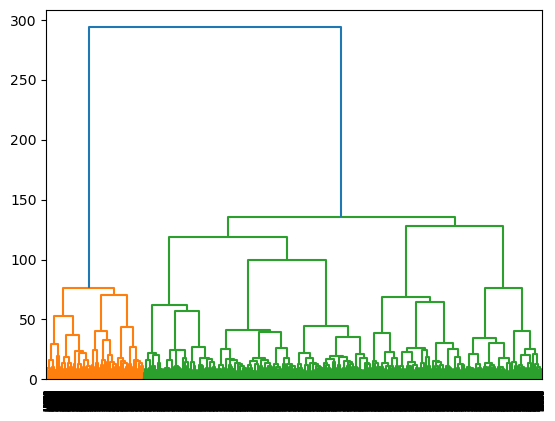

In [56]:
dendrogram(linkage_data)
plt.show()

In [57]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(train_data)

In [58]:
results['predicted_hierarchical_cluster'] = labels

In [59]:
print(results[['FraudFound_P']].value_counts())
print(results[['predicted_hierarchical_cluster']].value_counts())
print('\n')
evaluate_results(results['FraudFound_P'], results['predicted_hierarchical_cluster'])

FraudFound_P
0               14208
1                 892
dtype: int64
predicted_hierarchical_cluster
0                                 12118
1                                  2982
dtype: int64


Confusion Matrix: 
 [[11490  2718]
 [  628   264]]
TN: 11490, FP: 2718, FN: 628, TP: 264


Accuracy:  0.7784105960264901
Recall:  0.29596412556053814
F2:  0.20152671755725193


In [60]:
final_result['Hierarchical Cluster'] = get_metrics(results['FraudFound_P'], results['predicted_hierarchical_cluster'])

### 4.2 Anomaly Detection

#### Isolation Forest

In [61]:
isolation_forest = IsolationForest()
isolation_forest_labels = isolation_forest.fit_predict(train_data)

In [62]:
results['predicted_isolation_forest'] = [1 if x == -1 else 0 for x in isolation_forest_labels]

In [63]:
print(results[['FraudFound_P']].value_counts())
print(results[['predicted_isolation_forest']].value_counts())
print('\n')
evaluate_results(results['FraudFound_P'], results['predicted_isolation_forest'])

FraudFound_P
0               14208
1                 892
dtype: int64
predicted_isolation_forest
0                             12969
1                              2131
dtype: int64


Confusion Matrix: 
 [[12229  1979]
 [  740   152]]
TN: 12229, FP: 1979, FN: 740, TP: 152


Accuracy:  0.8199337748344371
Recall:  0.17040358744394618
F2:  0.13335672925074574


In [64]:
final_result['Isoation Forest'] = get_metrics(results['FraudFound_P'], results['predicted_isolation_forest'])

#### Local Outlier Factor

In [65]:
lof = LocalOutlierFactor()
lof_labels = lof.fit_predict(train_data)

In [66]:
results['predicted_lof'] = [1 if x == -1 else 0 for x in lof_labels]

In [67]:
print(results[['FraudFound_P']].value_counts())
print(results[['predicted_lof']].value_counts())
print('\n')
evaluate_results(results['FraudFound_P'], results['predicted_lof'])

FraudFound_P
0               14208
1                 892
dtype: int64
predicted_lof
0                15087
1                   13
dtype: int64


Confusion Matrix: 
 [[14197    11]
 [  890     2]]
TN: 14197, FP: 11, FN: 890, TP: 2


Accuracy:  0.9403311258278145
Recall:  0.002242152466367713
F2:  0.0027925160569673277


In [68]:
final_result['Local Outlier Factor'] = get_metrics(results['FraudFound_P'], results['predicted_lof'])

In [69]:
final_result

,Metrics,K Means,Gaussian Mixture,Hierarchical Cluster,Isoation Forest,Local Outlier Factor
0,Precision,0.087517,0.104463,0.088531,0.071328,0.153846
1,Recall,0.297085,0.123318,0.295964,0.170404,0.002242
2,F2-Score,0.200879,0.119022,0.201527,0.133357,0.002793


## 5. Supervised Learning

### Train Test split

In [70]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=19, stratify=y)

In [74]:
X_train.shape

(10872, 45)

In [75]:
X_val.shape

(2718, 45)

In [76]:
X_test.shape

(1510, 45)

In [77]:
y_train['FraudFound_P'].sum()

642

### Helper Functions

In [78]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings('ignore')

In [79]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))
    print("G-Mean: ", geometric_mean_score(y_test, y_pred))

In [80]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)

### 5.1 Training Model Without Handling Imbalance Data

#### Logistic Regression

In [81]:
LR = LogisticRegression(random_state=19)

In [82]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


#### Linear SVC

In [83]:
svc = LinearSVC(random_state=19)

In [84]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363


#### XBG Classifier

In [85]:
xgb = XGBClassifier(random_state=19)

In [86]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[2537   20]
 [ 150   11]]
TN: 2537, FP: 20, FN: 150, TP: 11


Precision:  0.3548387096774194
Recall:  0.06832298136645963
F2:  0.08148148148148149
G-Mean:  0.2603624047843152


#### Random Forest

In [87]:
rf = RandomForestClassifier(random_state=19)

In [88]:
train_model(X_train, X_val, y_train, y_val, rf)

Confusion Matrix: 
 [[2556    1]
 [ 153    8]]
TN: 2556, FP: 1, FN: 153, TP: 8


Precision:  0.8888888888888888
Recall:  0.049689440993788817
F2:  0.06125574272588055
G-Mean:  0.22286769232706855


#### AdaBoost

In [89]:
adb = AdaBoostClassifier(random_state=19)

In [90]:
train_model(X_train, X_val, y_train, y_val, adb)

Confusion Matrix: 
 [[2536   21]
 [ 159    2]]
TN: 2536, FP: 21, FN: 159, TP: 2


Precision:  0.08695652173913043
Recall:  0.012422360248447204
F2:  0.014992503748125937
G-Mean:  0.11099702031054069


#### Voting Classifier

In [91]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [92]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2557    0]
 [ 161    0]]
TN: 2557, FP: 0, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


In [93]:
vc = VotingClassifier(
    estimators=[('XGB',xgb), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [94]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2557    0]
 [ 153    8]]
TN: 2557, FP: 0, FN: 153, TP: 8


Precision:  1.0
Recall:  0.049689440993788817
F2:  0.061349693251533735
G-Mean:  0.22291128503014115


### 5.2 Imbalance Data Handling

#### Helper Functions

In [95]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [96]:
def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote

In [97]:
def get_sample_SMOTEENN(X_train, y_train, neighbour, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

In [98]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    X_test = X_val
    y_test = y_val

    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)


    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [99]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    evaluate_results(y_val, y_preds)
    Precision = precision_score(y_val, y_preds)
    F2 = fbeta_score(y_val, y_preds, beta=2)
    Recall = recall_score(y_val, y_preds)
    Gmean = geometric_mean_score(y_val, y_preds)
    return Precision, Recall, F2, Gmean

In [100]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [101]:
def get_performance_visualisation(method, X_train, X_val, y_train, y_val, classifier, neighbour=5):
    Precision_lst, F2_lst, Recall_lst, resampling, Gmean_lst = [], [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall', 'G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall', 'G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall','G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

In [102]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Precision_lst, F2_lst, Recall_lst, Gmean_lst = [], [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
    df['Precision'] = Precision_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['G-mean'] = Gmean_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Precision','F2 Score','Recall','G-mean'],
           title= 'Resampling Performance',
           ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

#### 5.2.1 SMOTE and SMOTEENN

##### XGB Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[2538   19]
 [ 148   13]]
TN: 2538, FP: 19, FN: 148, TP: 13


Precision:  0.40625
Recall:  0.08074534161490683
F2:  0.09615384615384615
G-Mean:  0.2830995525875262

Sampling Size: 0.2

Confusion Matrix: 
 [[2538   19]
 [ 149   12]]
TN: 2538, FP: 19, FN: 149, TP: 12


Precision:  0.3870967741935484
Recall:  0.07453416149068323
F2:  0.0888888888888889
G-Mean:  0.2719932521933205

Sampling Size: 0.3

Confusion Matrix: 
 [[2538   19]
 [ 150   11]]
TN: 2538, FP: 19, FN: 150, TP: 11


Precision:  0.36666666666666664
Recall:  0.06832298136645963
F2:  0.08160237388724037
G-Mean:  0.2604137127766911

Sampling Size: 0.4

Confusion Matrix: 
 [[2539   18]
 [ 149   12]]
TN: 2539, FP: 18, FN: 149, TP: 12


Precision:  0.4
Recall:  0.07453416149068323
F2:  0.08902077151335312
G-Mean:  0.2720468310872104

Sampling Size: 0.5

Confusion Matrix: 
 [[2542   15]
 [ 147   14]]
TN: 2542, FP: 15, FN: 147, TP: 14


Precision:  0.4827586206896552
Recall:  0.0869565217391

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.406250,0.096154,0.080745,0.283100,0.1
1,0.387097,0.088889,0.074534,0.271993,0.2
2,0.366667,0.081602,0.068323,0.260414,0.3
3,0.400000,0.089021,0.074534,0.272047,0.4
4,0.482759,0.104012,0.086957,0.294018,0.5
5,0.400000,0.089021,0.074534,0.272047,0.6
6,0.371429,0.095729,0.080745,0.282932,0.7
7,0.448276,0.096582,0.080745,0.283267,0.8
8,0.333333,0.074184,0.062112,0.248246,0.9
9,0.423077,0.082090,0.068323,0.260619,1.0


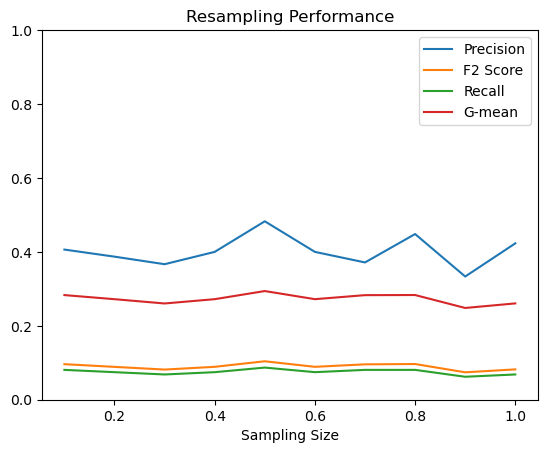

In [103]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2414  143]
 [ 126   35]]
TN: 2414, FP: 143, FN: 126, TP: 35


Precision:  0.19662921348314608
Recall:  0.21739130434782608
F2:  0.2128953771289538
G-Mean:  0.4530272781866986

Sampling Size: 0.2

Confusion Matrix: 
 [[2344  213]
 [ 124   37]]
TN: 2344, FP: 213, FN: 124, TP: 37


Precision:  0.148
Recall:  0.22981366459627328
F2:  0.20693512304250558
G-Mean:  0.4589880342345096

Sampling Size: 0.3

Confusion Matrix: 
 [[2325  232]
 [ 114   47]]
TN: 2325, FP: 232, FN: 114, TP: 47


Precision:  0.16845878136200718
Recall:  0.2919254658385093
F2:  0.25460455037919827
G-Mean:  0.515207415800917

Sampling Size: 0.4

Confusion Matrix: 
 [[2335  222]
 [ 122   39]]
TN: 2335, FP: 222, FN: 122, TP: 39


Precision:  0.14942528735632185
Recall:  0.2422360248447205
F2:  0.21546961325966854
G-Mean:  0.4703243283121521

Sampling Size: 0.5

Confusion Matrix: 
 [[2305  252]
 [ 108   53]]
TN: 2305, FP: 252, FN: 108, TP: 53


Precision:  0.1737704918032787
Recall:

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.196629,0.212895,0.217391,0.453027,0.1
1,0.148000,0.206935,0.229814,0.458988,0.2
2,0.168459,0.254605,0.291925,0.515207,0.3
3,0.149425,0.215470,0.242236,0.470324,0.4
4,0.173770,0.279241,0.329193,0.544747,0.5
5,0.152597,0.246849,0.291925,0.511984,0.6
6,0.165049,0.267576,0.316770,0.533674,0.7
7,0.163580,0.273760,0.329193,0.542498,0.8


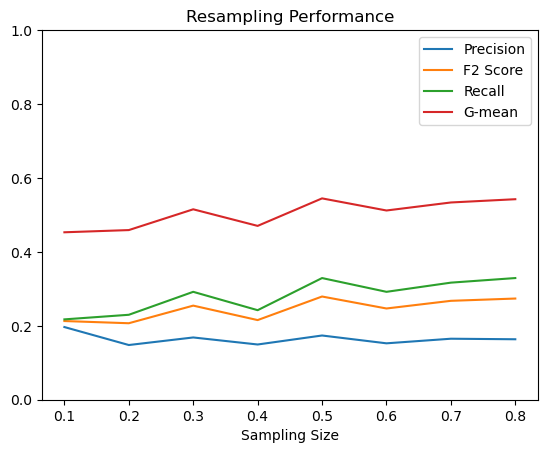

In [104]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2537   20]
 [ 150   11]]
TN: 2537, FP: 20, FN: 150, TP: 11


Precision:  0.3548387096774194
Recall:  0.06832298136645963
F2:  0.08148148148148149
G-Mean:  0.2603624047843152

Sampling Size: 2

Confusion Matrix: 
 [[2522   35]
 [ 145   16]]
TN: 2522, FP: 35, FN: 145, TP: 16


Precision:  0.3137254901960784
Recall:  0.09937888198757763
F2:  0.11510791366906474
G-Mean:  0.31307921081710716

Sampling Size: 3

Confusion Matrix: 
 [[2497   60]
 [ 138   23]]
TN: 2497, FP: 60, FN: 138, TP: 23


Precision:  0.27710843373493976
Recall:  0.14285714285714285
F2:  0.15818431911966988
G-Mean:  0.37350368174804544

Sampling Size: 4

Confusion Matrix: 
 [[2465   92]
 [ 137   24]]
TN: 2465, FP: 92, FN: 137, TP: 24


Precision:  0.20689655172413793
Recall:  0.14906832298136646
F2:  0.15789473684210528
G-Mean:  0.37908428463455224

Sampling Size: 5

Confusion Matrix: 
 [[2421  136]
 [ 131   30]]
TN: 2421, FP: 136, FN: 131, TP: 30


Precision:  0.18072289156626506
R

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.354839,0.081481,0.068323,0.260362,1
1,0.313725,0.115108,0.099379,0.313079,2
2,0.277108,0.158184,0.142857,0.373504,3
3,0.206897,0.157895,0.149068,0.379084,4
4,0.180723,0.185185,0.186335,0.420029,5
5,0.198895,0.218182,0.223602,0.459263,6
6,0.179775,0.194647,0.198758,0.432908,7
7,0.191176,0.229953,0.242236,0.476030,8
8,0.196172,0.240328,0.254658,0.487777,9
9,0.196653,0.266138,0.291925,0.519620,10


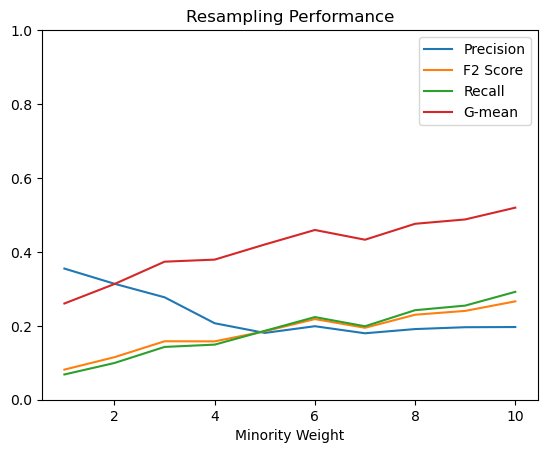

In [105]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

##### Logistic Regression

Sampling Size: 0.1

Confusion Matrix: 
 [[2550    7]
 [ 159    2]]
TN: 2550, FP: 7, FN: 159, TP: 2


Precision:  0.2222222222222222
Recall:  0.012422360248447204
F2:  0.015313935681470138
G-Mean:  0.11130297841883806

Sampling Size: 0.2

Confusion Matrix: 
 [[2492   65]
 [ 149   12]]
TN: 2492, FP: 65, FN: 149, TP: 12


Precision:  0.15584415584415584
Recall:  0.07453416149068323
F2:  0.08321775312066575
G-Mean:  0.2695171093039924

Sampling Size: 0.3

Confusion Matrix: 
 [[2369  188]
 [ 126   35]]
TN: 2369, FP: 188, FN: 126, TP: 35


Precision:  0.15695067264573992
Recall:  0.21739130434782608
F2:  0.20184544405997695
G-Mean:  0.44878491494553935

Sampling Size: 0.4

Confusion Matrix: 
 [[2241  316]
 [ 107   54]]
TN: 2241, FP: 316, FN: 107, TP: 54


Precision:  0.14594594594594595
Recall:  0.33540372670807456
F2:  0.26627218934911245
G-Mean:  0.5421750224853219

Sampling Size: 0.5

Confusion Matrix: 
 [[2086  471]
 [  89   72]]
TN: 2086, FP: 471, FN: 89, TP: 72


Precision:  0.13259668

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.222222,0.015314,0.012422,0.111303,0.1
1,0.155844,0.083218,0.074534,0.269517,0.2
2,0.156951,0.201845,0.217391,0.448785,0.3
3,0.145946,0.266272,0.335404,0.542175,0.4
4,0.132597,0.303286,0.447205,0.604011,0.5
5,0.127628,0.324427,0.527950,0.638741,0.6
6,0.131714,0.361150,0.639752,0.685469,0.7
7,0.128806,0.367156,0.683230,0.696012,0.8
8,0.124204,0.368852,0.726708,0.701598,0.9
9,0.125000,0.377764,0.763975,0.711848,1.0


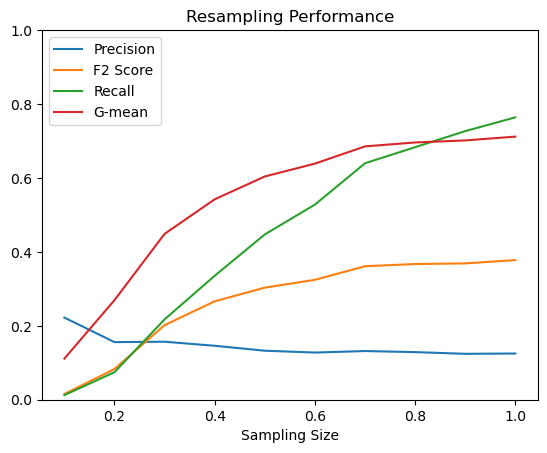

In [106]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2463   94]
 [ 143   18]]
TN: 2463, FP: 94, FN: 143, TP: 18


Precision:  0.16071428571428573
Recall:  0.11180124223602485
F2:  0.11904761904761905
G-Mean:  0.3281634104299046

Sampling Size: 0.2

Confusion Matrix: 
 [[2115  442]
 [  91   70]]
TN: 2115, FP: 442, FN: 91, TP: 70


Precision:  0.13671875
Recall:  0.43478260869565216
F2:  0.3027681660899654
G-Mean:  0.5996887529926664

Sampling Size: 0.3

Confusion Matrix: 
 [[1850  707]
 [  62   99]]
TN: 1850, FP: 707, FN: 62, TP: 99


Precision:  0.1228287841191067
Recall:  0.6149068322981367
F2:  0.34137931034482766
G-Mean:  0.6669989641712609

Sampling Size: 0.4

Confusion Matrix: 
 [[1721  836]
 [  43  118]]
TN: 1721, FP: 836, FN: 43, TP: 118


Precision:  0.12368972746331237
Recall:  0.7329192546583851
F2:  0.36921151439299127
G-Mean:  0.702349272299753

Sampling Size: 0.5

Confusion Matrix: 
 [[1633  924]
 [  30  131]]
TN: 1633, FP: 924, FN: 30, TP: 131


Precision:  0.12417061611374408
Recal

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.160714,0.119048,0.111801,0.328163,0.1
1,0.136719,0.302768,0.434783,0.599689,0.2
2,0.122829,0.341379,0.614907,0.666999,0.3
3,0.123690,0.369212,0.732919,0.702349,0.4
4,0.124171,0.385521,0.813665,0.720859,0.5
5,0.126364,0.398509,0.863354,0.734084,0.6
6,0.126984,0.404949,0.894410,0.740351,0.7
7,0.125977,0.403900,0.900621,0.739114,0.8


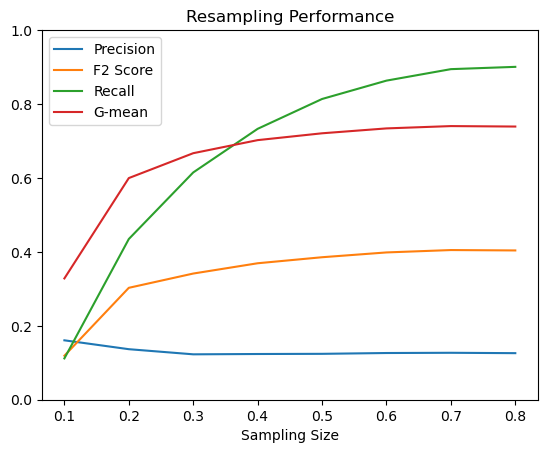

In [107]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0

Sampling Size: 2

Confusion Matrix: 
 [[2537   20]
 [ 158    3]]
TN: 2537, FP: 20, FN: 158, TP: 3


Precision:  0.13043478260869565
Recall:  0.018633540372670808
F2:  0.022488755622188907
G-Mean:  0.1359698313715265

Sampling Size: 3

Confusion Matrix: 
 [[2513   44]
 [ 156    5]]
TN: 2513, FP: 44, FN: 156, TP: 5


Precision:  0.10204081632653061
Recall:  0.031055900621118012
F2:  0.03607503607503607
G-Mean:  0.1747040385329715

Sampling Size: 4

Confusion Matrix: 
 [[2457  100]
 [ 145   16]]
TN: 2457, FP: 100, FN: 145, TP: 16


Precision:  0.13793103448275862
Recall:  0.09937888198757763
F2:  0.10526315789473685
G-Mean:  0.3090183487568205

Sampling Size: 5

Confusion Matrix: 
 [[2385  172]
 [ 128   33]]
TN: 2385, FP: 172, FN: 128, TP: 33


Precision:  0.16097560975609757
Recall:  0.20496894409937888
F2:  0.1943462897526502
G-Mean:  0.4

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.000000,0.000000,0.000000,0.000000,1
1,0.130435,0.022489,0.018634,0.135970,2
2,0.102041,0.036075,0.031056,0.174704,3
3,0.137931,0.105263,0.099379,0.309018,4
4,0.160976,0.194346,0.204969,0.437243,5
5,0.155015,0.262076,0.316770,0.531348,6
6,0.140389,0.293586,0.403727,0.583855,7
7,0.135225,0.325825,0.503106,0.633392,8
8,0.134910,0.355833,0.602484,0.675224,9
9,0.132859,0.376597,0.695652,0.704825,10


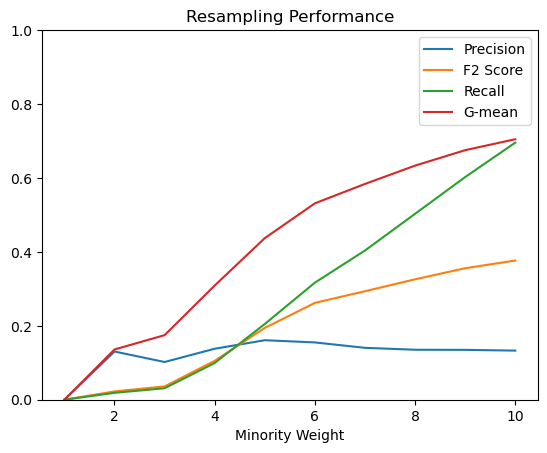

In [108]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

In [109]:
newLR = LogisticRegression(class_weight="balanced", random_state=19)
newLR.fit(X_train, y_train)
y_pred = newLR.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1524 1033]
 [  12  149]]
TN: 1524, FP: 1033, FN: 12, TP: 149


Precision:  0.1260575296108291
Recall:  0.9254658385093167
F2:  0.4079956188389923
G-Mean:  0.7426895541948388


##### Linear SVC

Sampling Size: 0.1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 0.2

Confusion Matrix: 
 [[2509   48]
 [ 152    9]]
TN: 2509, FP: 48, FN: 152, TP: 9


Precision:  0.15789473684210525
Recall:  0.055900621118012424
F2:  0.06419400855920114
G-Mean:  0.23420344733976972

Sampling Size: 0.3

Confusion Matrix: 
 [[2386  171]
 [ 126   35]]
TN: 2386, FP: 171, FN: 126, TP: 35


Precision:  0.16990291262135923
Recall:  0.21739130434782608
F2:  0.2058823529411765
G-Mean:  0.4503922820533753

Sampling Size: 0.4

Confusion Matrix: 
 [[2239  318]
 [ 109   52]]
TN: 2239, FP: 318, FN: 109, TP: 52


Precision:  0.14054054054054055
Recall:  0.32298136645962733
F2:  0.25641025641025644
G-Mean:  0.5318025513833526

Sampling Size: 0.5

Confusion Matrix: 
 [[2084  473]
 [  87   74]]
TN: 2084, FP: 473, FN: 87, TP: 74


Precision:  0.13528336380255943
Recall

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.500000,0.007740,0.006211,0.078796,0.1
1,0.157895,0.064194,0.055901,0.234203,0.2
2,0.169903,0.205882,0.217391,0.450392,0.3
3,0.140541,0.256410,0.322981,0.531803,0.4
4,0.135283,0.310663,0.459627,0.612049,0.5
5,0.128093,0.330579,0.546584,0.646948,0.6
6,0.131677,0.365769,0.658385,0.691668,0.7
7,0.128492,0.373619,0.714286,0.704554,0.8
8,0.126135,0.382263,0.776398,0.716553,0.9
9,0.123552,0.380952,0.795031,0.716040,1.0


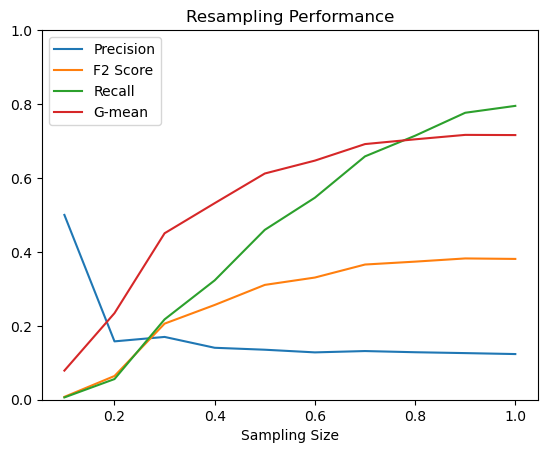

In [110]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2494   63]
 [ 150   11]]
TN: 2494, FP: 63, FN: 150, TP: 11


Precision:  0.14864864864864866
Recall:  0.06832298136645963
F2:  0.07660167130919221
G-Mean:  0.25814651423385004

Sampling Size: 0.2

Confusion Matrix: 
 [[2113  444]
 [  86   75]]
TN: 2113, FP: 444, FN: 86, TP: 75


Precision:  0.14450867052023122
Recall:  0.4658385093167702
F2:  0.3224419604471195
G-Mean:  0.6204432701393564

Sampling Size: 0.3

Confusion Matrix: 
 [[1835  722]
 [  61  100]]
TN: 1835, FP: 722, FN: 61, TP: 100


Precision:  0.12165450121654502
Recall:  0.6211180124223602
F2:  0.34106412005457026
G-Mean:  0.6676359781303781

Sampling Size: 0.4

Confusion Matrix: 
 [[1689  868]
 [  36  125]]
TN: 1689, FP: 868, FN: 36, TP: 125


Precision:  0.12588116817724068
Recall:  0.7763975155279503
F2:  0.38179596823457546
G-Mean:  0.7161294422593389

Sampling Size: 0.5

Confusion Matrix: 
 [[1593  964]
 [  24  137]]
TN: 1593, FP: 964, FN: 24, TP: 137


Precision:  0.12443233424

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.148649,0.076602,0.068323,0.258147,0.1
1,0.144509,0.322442,0.465839,0.620443,0.2
2,0.121655,0.341064,0.621118,0.667636,0.3
3,0.125881,0.381796,0.776398,0.716129,0.4
4,0.124432,0.392550,0.850932,0.728098,0.5
5,0.125654,0.402235,0.894410,0.737510,0.6
6,0.125213,0.404290,0.913043,0.739139,0.7
7,0.125632,0.407104,0.925466,0.741714,0.8


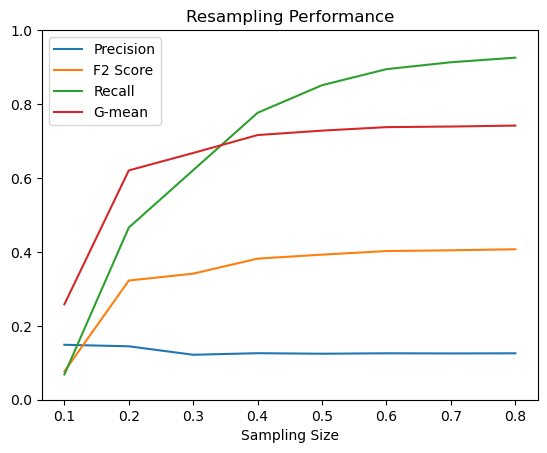

In [111]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 2

Confusion Matrix: 
 [[2553    4]
 [ 160    1]]
TN: 2553, FP: 4, FN: 160, TP: 1


Precision:  0.2
Recall:  0.006211180124223602
F2:  0.007704160246533127
G-Mean:  0.0787493731335408

Sampling Size: 3

Confusion Matrix: 
 [[2498   59]
 [ 155    6]]
TN: 2498, FP: 59, FN: 155, TP: 6


Precision:  0.09230769230769231
Recall:  0.037267080745341616
F2:  0.04231311706629055
G-Mean:  0.1908066647197413

Sampling Size: 4

Confusion Matrix: 
 [[2500   57]
 [ 155    6]]
TN: 2500, FP: 57, FN: 155, TP: 6


Precision:  0.09523809523809523
Recall:  0.037267080745341616
F2:  0.042432814710042434
G-Mean:  0.19088303320977923

Sampling Size: 5

Confusion Matrix: 
 [[2437  120]
 [ 138   23]]
TN: 2437, FP: 120, FN: 138, TP: 23


Precision:  0.16083916083916083
Recall:  0.14285714285714285
F2

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.500000,0.007740,0.006211,0.078796,1
1,0.200000,0.007704,0.006211,0.078749,2
2,0.092308,0.042313,0.037267,0.190807,3
3,0.095238,0.042433,0.037267,0.190883,4
4,0.160839,0.146125,0.142857,0.368989,5
5,0.142857,0.200893,0.223602,0.452453,6
6,0.150538,0.227519,0.260870,0.486508,7
7,0.156658,0.292113,0.372671,0.570609,8
8,0.147110,0.345679,0.521739,0.649900,9
9,0.140600,0.348473,0.552795,0.659688,10


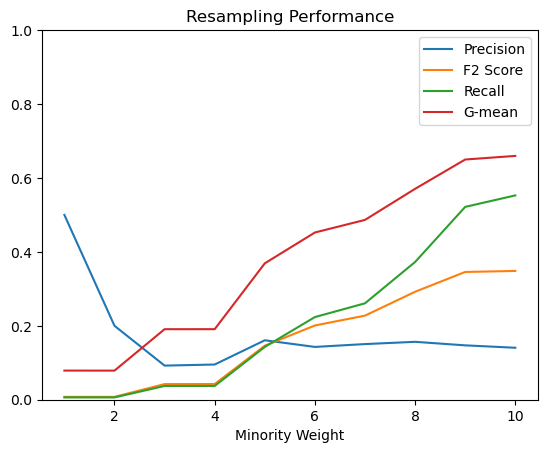

In [112]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LinearSVC)

In [113]:
newSVC = LinearSVC(class_weight="balanced", random_state=19)
newSVC.fit(X_train, y_train)
y_pred = newSVC.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1542 1015]
 [  16  145]]
TN: 1542, FP: 1015, FN: 16, TP: 145


Precision:  0.125
Recall:  0.9006211180124224
F2:  0.40188470066518844
G-Mean:  0.7369667362018131


##### Random Forest

Sampling Size: 0.1

Confusion Matrix: 
 [[2553    4]
 [ 152    9]]
TN: 2553, FP: 4, FN: 152, TP: 9


Precision:  0.6923076923076923
Recall:  0.055900621118012424
F2:  0.06849315068493152
G-Mean:  0.23624811940062243

Sampling Size: 0.2

Confusion Matrix: 
 [[2551    6]
 [ 153    8]]
TN: 2551, FP: 6, FN: 153, TP: 8


Precision:  0.5714285714285714
Recall:  0.049689440993788817
F2:  0.06079027355623099
G-Mean:  0.222649600786108

Sampling Size: 0.3

Confusion Matrix: 
 [[2551    6]
 [ 150   11]]
TN: 2551, FP: 6, FN: 150, TP: 11


Precision:  0.6470588235294118
Recall:  0.06832298136645963
F2:  0.08320726172465961
G-Mean:  0.26107979911138895

Sampling Size: 0.4

Confusion Matrix: 
 [[2548    9]
 [ 153    8]]
TN: 2548, FP: 9, FN: 153, TP: 8


Precision:  0.47058823529411764
Recall:  0.049689440993788817
F2:  0.0605143721633888
G-Mean:  0.22251864326034676

Sampling Size: 0.5

Confusion Matrix: 
 [[2544   13]
 [ 149   12]]
TN: 2544, FP: 13, FN: 149, TP: 12


Precision:  0.48
Recall:  0.074

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.692308,0.068493,0.055901,0.236248,0.1
1,0.571429,0.060790,0.049689,0.222650,0.2
2,0.647059,0.083207,0.068323,0.261080,0.3
3,0.470588,0.060514,0.049689,0.222519,0.4
4,0.480000,0.089686,0.074534,0.272315,0.5
5,0.346154,0.067164,0.055901,0.235646,0.6
6,0.346154,0.067164,0.055901,0.235646,0.7
7,0.440000,0.082212,0.068323,0.260670,0.8
8,0.468750,0.110947,0.093168,0.304217,0.9
9,0.466667,0.103858,0.086957,0.293960,1.0


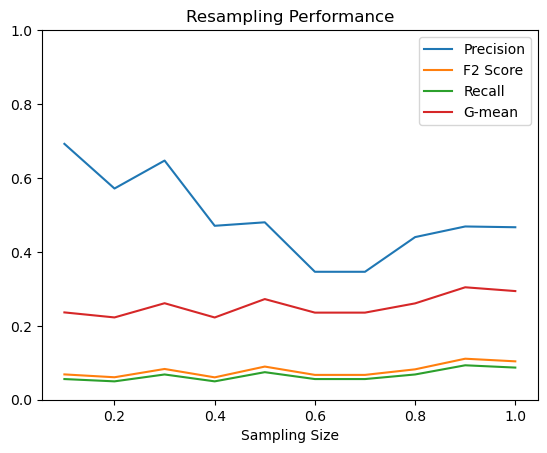

In [114]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2504   53]
 [ 143   18]]
TN: 2504, FP: 53, FN: 143, TP: 18


Precision:  0.2535211267605634
Recall:  0.11180124223602485
F2:  0.1258741258741259
G-Mean:  0.33088350139809086

Sampling Size: 0.2

Confusion Matrix: 
 [[2402  155]
 [ 127   34]]
TN: 2402, FP: 155, FN: 127, TP: 34


Precision:  0.17989417989417988
Recall:  0.2111801242236025
F2:  0.20408163265306126
G-Mean:  0.4453973800086106

Sampling Size: 0.3

Confusion Matrix: 
 [[2363  194]
 [ 122   39]]
TN: 2363, FP: 194, FN: 122, TP: 39


Precision:  0.16738197424892703
Recall:  0.2422360248447205
F2:  0.2223489167616876
G-Mean:  0.4731358565978922

Sampling Size: 0.4

Confusion Matrix: 
 [[2349  208]
 [ 118   43]]
TN: 2349, FP: 208, FN: 118, TP: 43


Precision:  0.17131474103585656
Recall:  0.2670807453416149
F2:  0.24022346368715083
G-Mean:  0.4953331958342455

Sampling Size: 0.5

Confusion Matrix: 
 [[2325  232]
 [ 110   51]]
TN: 2325, FP: 232, FN: 110, TP: 51


Precision:  0.180212014134

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.253521,0.125874,0.111801,0.330884,0.1
1,0.179894,0.204082,0.211180,0.445397,0.2
2,0.167382,0.222349,0.242236,0.473136,0.3
3,0.171315,0.240223,0.267081,0.495333,0.4
4,0.180212,0.275081,0.316770,0.536684,0.5
5,0.143333,0.227754,0.267081,0.490140,0.6
6,0.167785,0.265393,0.310559,0.529564,0.7
7,0.158730,0.260688,0.310559,0.527611,0.8


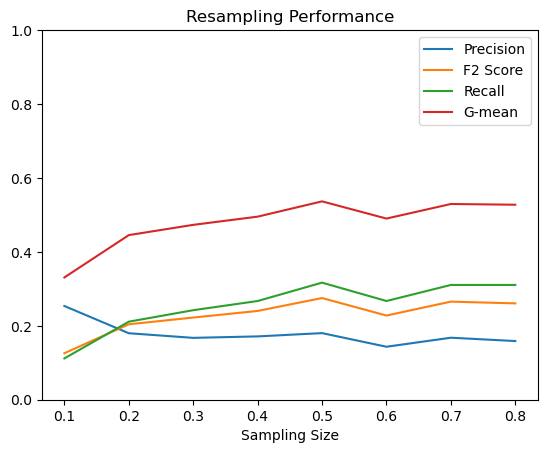

In [115]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2556    1]
 [ 153    8]]
TN: 2556, FP: 1, FN: 153, TP: 8


Precision:  0.8888888888888888
Recall:  0.049689440993788817
F2:  0.06125574272588055
G-Mean:  0.22286769232706855

Sampling Size: 2

Confusion Matrix: 
 [[2555    2]
 [ 154    7]]
TN: 2555, FP: 2, FN: 154, TP: 7


Precision:  0.7777777777777778
Recall:  0.043478260869565216
F2:  0.05359877488514548
G-Mean:  0.20843285159979544

Sampling Size: 3

Confusion Matrix: 
 [[2556    1]
 [ 155    6]]
TN: 2556, FP: 1, FN: 155, TP: 6


Precision:  0.8571428571428571
Recall:  0.037267080745341616
F2:  0.04608294930875577
G-Mean:  0.19300908323805555

Sampling Size: 4

Confusion Matrix: 
 [[2556    1]
 [ 155    6]]
TN: 2556, FP: 1, FN: 155, TP: 6


Precision:  0.8571428571428571
Recall:  0.037267080745341616
F2:  0.04608294930875577
G-Mean:  0.19300908323805555

Sampling Size: 5

Confusion Matrix: 
 [[2555    2]
 [ 155    6]]
TN: 2555, FP: 2, FN: 155, TP: 6


Precision:  0.75
Recall:  0.0372670807453

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.888889,0.061256,0.049689,0.222868,1
1,0.777778,0.053599,0.043478,0.208433,2
2,0.857143,0.046083,0.037267,0.193009,3
3,0.857143,0.046083,0.037267,0.193009,4
4,0.750000,0.046012,0.037267,0.192971,5
5,0.857143,0.046083,0.037267,0.193009,6
6,0.777778,0.053599,0.043478,0.208433,7
7,1.000000,0.038521,0.031056,0.176227,8
8,0.750000,0.046012,0.037267,0.192971,9
9,0.777778,0.053599,0.043478,0.208433,10


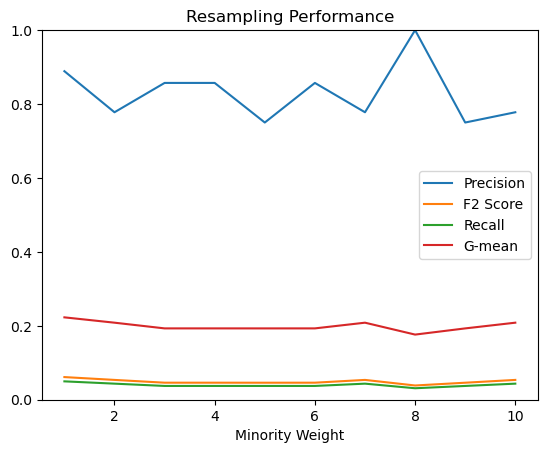

In [116]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, RandomForestClassifier)

In [117]:
newrf = RandomForestClassifier(class_weight="balanced", random_state=19)
newrf.fit(X_train, y_train)
y_pred = newrf.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[2556    1]
 [ 154    7]]
TN: 2556, FP: 1, FN: 154, TP: 7


Precision:  0.875
Recall:  0.043478260869565216
F2:  0.05368098159509202
G-Mean:  0.2084736368172095


##### AdaBoost Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[2532   25]
 [ 159    2]]
TN: 2532, FP: 25, FN: 159, TP: 2


Precision:  0.07407407407407407
Recall:  0.012422360248447204
F2:  0.014903129657228016
G-Mean:  0.11090944868325085

Sampling Size: 0.2

Confusion Matrix: 
 [[2521   36]
 [ 159    2]]
TN: 2521, FP: 36, FN: 159, TP: 2


Precision:  0.05263157894736842
Recall:  0.012422360248447204
F2:  0.014662756598240468
G-Mean:  0.11066826940493761

Sampling Size: 0.3

Confusion Matrix: 
 [[2521   36]
 [ 155    6]]
TN: 2521, FP: 36, FN: 155, TP: 6


Precision:  0.14285714285714285
Recall:  0.037267080745341616
F2:  0.043731778425655975
G-Mean:  0.19168306539507227

Sampling Size: 0.4

Confusion Matrix: 
 [[2481   76]
 [ 144   17]]
TN: 2481, FP: 76, FN: 144, TP: 17


Precision:  0.1827956989247312
Recall:  0.10559006211180125
F2:  0.11533242876526459
G-Mean:  0.32008073879969534

Sampling Size: 0.5

Confusion Matrix: 
 [[2444  113]
 [ 142   19]]
TN: 2444, FP: 113, FN: 142, TP: 19


Precision:  0.1439

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.074074,0.014903,0.012422,0.110909,0.1
1,0.052632,0.014663,0.012422,0.110668,0.2
2,0.142857,0.043732,0.037267,0.191683,0.3
3,0.182796,0.115332,0.105590,0.320081,0.4
4,0.143939,0.122423,0.118012,0.335853,0.5
5,0.155844,0.150376,0.149068,0.376151,0.6
6,0.119266,0.150812,0.161491,0.386477,0.7
7,0.135965,0.177752,0.192547,0.421559,0.8
8,0.147465,0.185830,0.198758,0.429392,0.9
9,0.159259,0.235230,0.267081,0.493326,1.0


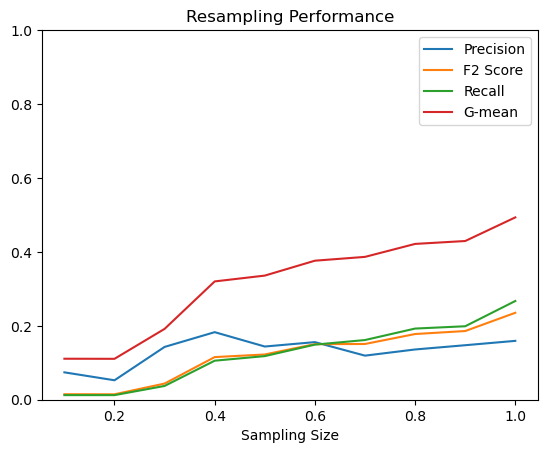

In [118]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2481   76]
 [ 151   10]]
TN: 2481, FP: 76, FN: 151, TP: 10


Precision:  0.11627906976744186
Recall:  0.062111801242236024
F2:  0.06849315068493152
G-Mean:  0.24549072026376645

Sampling Size: 0.2

Confusion Matrix: 
 [[2316  241]
 [ 118   43]]
TN: 2316, FP: 241, FN: 118, TP: 43


Precision:  0.15140845070422534
Recall:  0.2670807453416149
F2:  0.23168103448275862
G-Mean:  0.4918415373404469

Sampling Size: 0.3

Confusion Matrix: 
 [[2235  322]
 [ 109   52]]
TN: 2235, FP: 322, FN: 109, TP: 52


Precision:  0.13903743315508021
Recall:  0.32298136645962733
F2:  0.2554027504911591
G-Mean:  0.5313273032532294

Sampling Size: 0.4

Confusion Matrix: 
 [[2150  407]
 [  99   62]]
TN: 2150, FP: 407, FN: 99, TP: 62


Precision:  0.13219616204690832
Recall:  0.38509316770186336
F2:  0.27852650494159925
G-Mean:  0.5690321083248785

Sampling Size: 0.5

Confusion Matrix: 
 [[2047  510]
 [  82   79]]
TN: 2047, FP: 510, FN: 82, TP: 79


Precision:  0.134125636

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.116279,0.068493,0.062112,0.245491,0.1
1,0.151408,0.231681,0.267081,0.491842,0.2
2,0.139037,0.255403,0.322981,0.531327,0.3
3,0.132196,0.278527,0.385093,0.569032,0.4
4,0.134126,0.320357,0.490683,0.626750,0.5
5,0.137371,0.352006,0.577640,0.667616,0.6
6,0.122807,0.328520,0.565217,0.649259,0.7
7,0.125490,0.340667,0.596273,0.663527,0.8


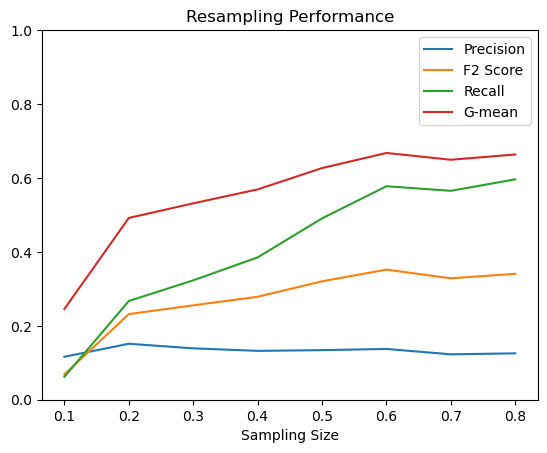

In [119]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, AdaBoostClassifier(random_state=19))

#### 5.2.2 Using Class Weighing on Voting Classifier

In [120]:
vc_class = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [121]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class)

Confusion Matrix: 
 [[1558  999]
 [  16  145]]
TN: 1558, FP: 999, FN: 16, TP: 145


Precision:  0.12674825174825174
Recall:  0.9006211180124224
F2:  0.4054809843400448
G-Mean:  0.7407803023439352


(0.12674825174825174,
 0.9006211180124224,
 0.4054809843400448,
 0.7407803023439352)

In [122]:
vc_class_2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [123]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_2)

Confusion Matrix: 
 [[1858  699]
 [  52  109]]
TN: 1858, FP: 699, FN: 52, TP: 109


Precision:  0.1349009900990099
Recall:  0.6770186335403726
F2:  0.37534435261707993
G-Mean:  0.70138714481631


(0.1349009900990099, 0.6770186335403726, 0.37534435261707993, 0.70138714481631)

In [124]:
vc_class_3 = VotingClassifier(
    estimators=[('XGB',XGBClassifier(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [125]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_3)

Confusion Matrix: 
 [[2235  322]
 [ 101   60]]
TN: 2235, FP: 322, FN: 101, TP: 60


Precision:  0.15706806282722513
Recall:  0.37267080745341613
F2:  0.2923976608187135
G-Mean:  0.570737077264347


(0.15706806282722513,
 0.37267080745341613,
 0.2923976608187135,
 0.570737077264347)

#### 5.2.3 Hyperparameter Tuning for XGB

##### Hyerparameter Tuning

In [126]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [127]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier, sampling):

    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [128]:
def hyperopt(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf, 0.8)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [129]:
# XGB Bayesian hyperopt

num_eval = 100

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [130]:
load = True #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('TuningFS/XGB_hyperopt.pkl')
    except Exception as e:
        print(e)

In [131]:
XGB_hyperopt[1]

{'booster': 0,
 'colsample_bylevel': 0.19151572699658645,
 'colsample_bynode': 0.6329283822987078,
 'colsample_bytree': 0.3865791309646543,
 'gamma': 16.60120812043403,
 'learning_rate': 0.1866255601330448,
 'max_depth': 8.0,
 'min_child_weight': 1.749492711643751,
 'n_estimators': 540.0,
 'reg_alpha': 0.08277604446149361,
 'reg_lambda': 4.451367764866161,
 'scale_pos_weight': 7.919235255732057,
 'subsample': 0.2076764026764466}

In [132]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [133]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
90,-0.409658,[0],[0.19151572699658645],[0.6329283822987078],[0.3865791309646543],[16.60120812043403],[0.1866255601330448],[8.0],[1.749492711643751],[540.0],[0.08277604446149361],[4.451367764866161],[7.919235255732057],[0.2076764026764466]
93,-0.409471,[0],[0.22494925286321146],[0.7998908338400603],[0.4419487324977333],[18.17861591290695],[0.2396906973553982],[6.0],[1.9647438437649858],[480.0],[0.08672409792698169],[5.367882913066752],[5.136981614174474],[0.15301475420936214]
80,-0.406758,[1],[0.24820165646923426],[0.6976895049491914],[0.37634183049919484],[6.086361603124004],[0.1635963493997701],[8.0],[1.7614214422417103],[360.0],[0.0917472132546593],[5.009072631144652],[7.912016181041552],[0.363495327553889]
31,-0.406699,[0],[0.37820072856019105],[0.4234785140235286],[0.2861548752067796],[3.120912105721594],[0.14643261185206102],[20.0],[1.6187680470422117],[280.0],[0.088426110696496],[1.788656068447556],[4.37356914836289],[0.26570664736101146]
57,-0.406351,[1],[0.3010509344095089],[0.5196034479251982],[0.20184563344422413],[11.226228856462573],[0.14693548660536573],[13.0],[1.5842318126186468],[180.0],[0.05727313343734695],[4.9927953639932205],[8.47534891508078],[0.3543100244504304]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,-0.314685,[0],[0.27361042727782703],[0.5970071961052026],[0.5032384428462213],[8.878296073349254],[0.377369975401263],[8.0],[1.6522746236418113],[380.0],[0.06146049195876007],[2.2586232331479534],[2.9619205124506593],[0.4714336548674028]
60,-0.309675,[1],[0.3495939681791183],[0.1440202052520897],[0.32656458074817635],[15.16710443603097],[0.11030422688114279],[2.0],[1.6599979491915686],[80.0],[0.047929222199682375],[5.766070407865156],[1.009913770695424],[0.3541854755011202]
87,-0.309320,[1],[0.20795329564482362],[0.28496955822207504],[0.33715715759060333],[5.666177337523772],[0.05020764285327747],[4.0],[1.6195817142081859],[80.0],[0.07670341359275183],[3.904267344745553],[1.9710664680057985],[0.2932248158868228]
15,-0.284043,[0],[0.2861178614592421],[0.17674891740181597],[0.6037906143926959],[8.72532339401416],[0.2323726087685452],[14.0],[1.9140536670191193],[320.0],[0.09663500287155227],[3.160478490901445],[1.0834513406053539],[0.4528979846592037]


In [134]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']],
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'],
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'],
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'],
                                  gamma = xg_chosen['gamma'],
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [135]:
xgboost_model_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.19151572699658645,
              colsample_bynode=0.6329283822987078,
              colsample_bytree=0.3865791309646543, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=16.60120812043403,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1866255601330448,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1.749492711643751, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=540,
              n_jobs=None, num_parallel_tree=None, random_state=19, ...)

##### Model without tuning

In [136]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1408   13]
 [  83    6]]
TN: 1408, FP: 13, FN: 83, TP: 6


Precision:  0.3157894736842105
Recall:  0.06741573033707865
F2:  0.08
G-Mean:  0.2584549833254823


##### Model without tuning but with imbalance handling

In [137]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1252  169]
 [  54   35]]
TN: 1252, FP: 169, FN: 54, TP: 35


Precision:  0.1715686274509804
Recall:  0.39325842696629215
F2:  0.3125
G-Mean:  0.5886323743864162


(0.1715686274509804, 0.39325842696629215, 0.3125, 0.5886323743864162)

##### 1st Round Tuning

In [138]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_1)

Confusion Matrix: 
 [[789 632]
 [  5  84]]
TN: 789, FP: 632, FN: 5, TP: 84


Precision:  0.11731843575418995
Recall:  0.9438202247191011
F2:  0.39179104477611937
G-Mean:  0.7239125442916488


(0.11731843575418995,
 0.9438202247191011,
 0.39179104477611937,
 0.7239125442916488)

##### Feature Importance

In [139]:
feature_weight = xgboost_model_1.feature_importances_

In [140]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [141]:
weight_df.sort_values('weights', ascending=False)

,weights
BasePolicy_Collision,0.206785
Fault,0.095274
BasePolicy_Liability,0.091456
BasePolicy_All Perils,0.069336
VehicleCategory_Sedan,0.040639
VehicleCategory_Sport,0.038241
DayOfWeek_Thursday,0.027350
Make,0.021237
AgentType,0.020988
WeekOfMonthClaimed_3,0.019053


In [142]:
def plot_coefficients_trees(coef, feature_names, top_features=20):
    top_coefficients = np.argsort(coef)[-top_features:]
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title("Top 20 Weights")
    plt.show()

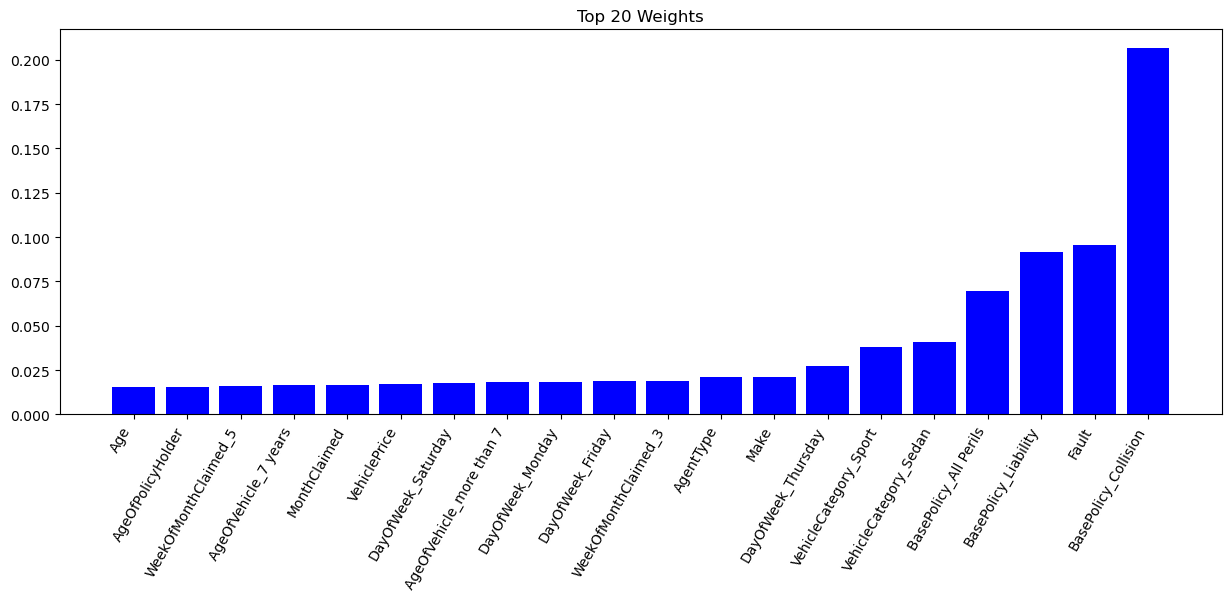

In [143]:
plot_coefficients_trees(weight_df['weights'], weight_df.index)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

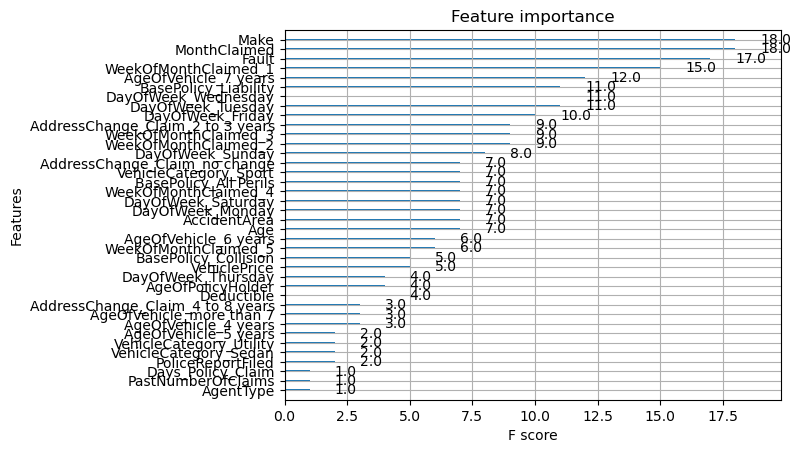

In [144]:
from xgboost import plot_importance
plot_importance(xgboost_model_1)

#### 5.2.4 Hyperparameter Tuning for LR

##### Hyperparmeter Tuning

In [145]:
num_eval = 100

LR_param_hyperopt = {
            'warm_start' : hp.choice('warm_start', [True, False]),
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'solver' : hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag', 'saga']),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'multi_class' : 'auto',
            'class_weight' : 'balanced',
}

In [146]:
load = True
if(load == False):
    LR_hyperopt1 = hyperopt(LR_param_hyperopt,  num_eval, LogisticRegression)
    save_file('TuningFS/LR_hyperopt1.pkl', LR_hyperopt1)
else:
    try:
        LR_hyperopt1 = load_file('TuningFS/LR_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [147]:
LR_hyperopt1[1]

{'C': 0.38483951559484364,
 'fit_intercept': 1,
 'max_iter': 625,
 'solver': 1,
 'tol': 2.497446462286831e-05,
 'warm_start': 1}

In [148]:
trials = LR_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [149]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,solver,tol,warm_start
97,-0.400341,[0.38483951559484364],[1],[625],[1],[2.497446462286831e-05],[1]
65,-0.399885,[2.6559538990039635],[1],[210],[0],[6.236074039057156e-05],[1]
79,-0.399885,[2.612077812216334],[1],[794],[1],[3.439277567033789e-05],[1]
51,-0.399885,[2.660035668728218],[1],[657],[2],[7.479801425650578e-05],[0]
54,-0.399885,[2.6859535146476747],[1],[554],[2],[5.9776994981940255e-05],[0]
...,...,...,...,...,...,...,...
58,-0.396736,[0.20182318875810634],[1],[92],[2],[4.6956840086325634e-05],[0]
7,-0.396011,[0.6231375564399231],[0],[89],[1],[8.73713316338657e-05],[0]
83,-0.394511,[0.796726984396104],[1],[551],[1],[1.8431451081218683e-05],[0]
99,-0.392539,[0.0929797854433157],[1],[210],[1],[3.331055191009184e-05],[1]


In [150]:
lr_chosen = LR_hyperopt1[1]

LR_model_1   =   LogisticRegression(warm_start=[True, False][lr_chosen['warm_start']],
                                    fit_intercept=[True, False][lr_chosen['fit_intercept']],
                                    tol= lr_chosen['tol'],
                                    C=lr_chosen['C'],
                                    solver=['lbfgs','newton-cg','liblinear','sag', 'saga'][lr_chosen['solver']],
                                    max_iter=lr_chosen['max_iter'],
                                    multi_class='auto',
                                    class_weight='balanced',
                                    random_state=19)

In [151]:
LR_model_1

LogisticRegression(C=0.38483951559484364, class_weight='balanced',
                   fit_intercept=False, max_iter=625, random_state=19,
                   solver='newton-cg', tol=2.497446462286831e-05)

##### Model without tuning

In [152]:
train_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=19))

Confusion Matrix: 
 [[1417    4]
 [  89    0]]
TN: 1417, FP: 4, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


##### Model without tuning but with imbalance handling

In [153]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LogisticRegression(random_state=19))

Confusion Matrix: 
 [[840 581]
 [  7  82]]
TN: 840, FP: 581, FN: 7, TP: 82


Precision:  0.12368024132730016
Recall:  0.9213483146067416
F2:  0.40235525024533864
G-Mean:  0.7379968819697605


(0.12368024132730016,
 0.9213483146067416,
 0.40235525024533864,
 0.7379968819697605)

##### Model with tuning

In [154]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LR_model_1)

Confusion Matrix: 
 [[861 560]
 [  9  80]]
TN: 861, FP: 560, FN: 9, TP: 80


Precision:  0.125
Recall:  0.898876404494382
F2:  0.4016064257028113
G-Mean:  0.7379968819697605


(0.125, 0.898876404494382, 0.4016064257028113, 0.7379968819697605)

In [155]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title("Top 20 Positive and Negative Weights")
    plt.show()

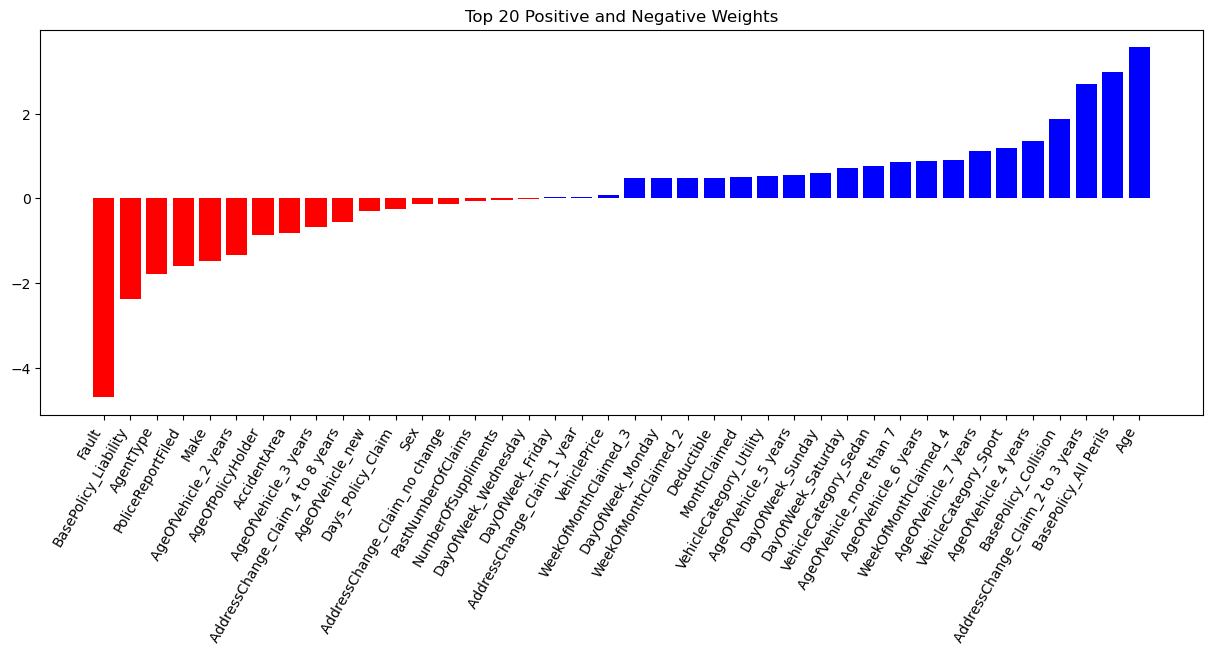

In [156]:
plot_coefficients(LR_model_1, LR_model_1.feature_names_in_)

In [157]:
LR_model_1.coef_

array([[ 0.49198734,  3.55991898, -0.14027889, -0.02892801, -1.78733795,
        -0.80649653, -1.60187049, -0.86650923,  0.092074  ,  0.5138506 ,
        -0.05306296, -0.25048559, -1.47265364, -4.68600876,  0.03186429,
         0.47697189,  0.70643505,  0.59524388,  0.36126115,  0.34019762,
        -0.02504673,  0.42597314,  0.48731929,  0.47078826,  0.89696686,
         0.20587962,  2.97800531,  1.87165559, -2.36273374,  0.76024799,
         1.19625144,  0.53042773, -1.32687568, -0.67392038,  1.35764755,
         0.54961622,  0.89087612,  1.1264286 ,  0.86654704, -0.3033923 ,
         0.03798897,  2.69754302, -0.55287839, -0.1209956 ,  0.42526916]])

#### 5.2.5 Hyperparameter Tuning for SVC

##### Hyperparameter Tuning

In [158]:
num_eval = 100

SVC_param_hyperopt = {
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'class_weight' : 'balanced',
                }

In [159]:
load = True
if(load == False):
    SVC_hyperopt1 = hyperopt(SVC_param_hyperopt,  num_eval, LinearSVC)
    save_file('TuningFS/SVC_hyperopt1.pkl', SVC_hyperopt1)
else:
    try:
        SVC_hyperopt1 = load_file('TuningFS/SVC_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [160]:
SVC_hyperopt1[1]

{'C': 5.515706706142934,
 'fit_intercept': 1,
 'max_iter': 601,
 'tol': 7.414036053743112e-05}

In [161]:
trials = SVC_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [162]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,tol
39,-0.410017,[5.515706706142934],[1],[601],[7.414036053743112e-05]
72,-0.408602,[6.258250438898663],[1],[152],[8.290783714676018e-05]
22,-0.407880,[3.527686645913314],[1],[186],[6.18701944168837e-05]
91,-0.407549,[3.5353929441112677],[1],[527],[4.977774463316323e-05]
34,-0.407104,[4.903719847801875],[1],[601],[7.540272042432287e-05]
...,...,...,...,...,...
2,-0.339398,[7.081437358334119],[0],[705],[8.504587118151156e-05]
76,-0.334101,[6.818908160888204],[1],[334],[4.7490282882961475e-05]
40,-0.317737,[7.970914652542083],[1],[15],[4.968886635273788e-05]
30,-0.304878,[9.702629523492087],[1],[661],[6.099759089173338e-05]


In [163]:
SVC_chosen = SVC_hyperopt1[1]

SVC_model_1   =   LinearSVC(fit_intercept=[True, False][SVC_chosen['fit_intercept']],
                                    tol= SVC_chosen['tol'],
                                    C=SVC_chosen['C'],
                                    max_iter=SVC_chosen['max_iter'],
                                    class_weight='balanced',
                                    random_state=19)

In [164]:
SVC_model_1

LinearSVC(C=5.515706706142934, class_weight='balanced', fit_intercept=False,
          max_iter=601, random_state=19, tol=7.414036053743112e-05)

##### Model Without Tuning

In [165]:
train_model(X_train, X_test, y_train, y_test, LinearSVC(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  88    1]]
TN: 1421, FP: 0, FN: 88, TP: 1


Precision:  1.0
Recall:  0.011235955056179775
F2:  0.014005602240896357
G-Mean:  0.105999788000636


##### Model without tuning but with imbalance handling

In [166]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LinearSVC(random_state=19))

Confusion Matrix: 
 [[830 591]
 [  6  83]]
TN: 830, FP: 591, FN: 6, TP: 83


Precision:  0.12314540059347182
Recall:  0.9325842696629213
F2:  0.4029126213592233
G-Mean:  0.7380504512277681


(0.12314540059347182,
 0.9325842696629213,
 0.4029126213592233,
 0.7380504512277681)

##### Model With Tuning

In [167]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,SVC_model_1)

Confusion Matrix: 
 [[865 556]
 [  7  82]]
TN: 865, FP: 556, FN: 7, TP: 82


Precision:  0.12852664576802508
Recall:  0.9213483146067416
F2:  0.4124748490945674
G-Mean:  0.7488984601959779


(0.12852664576802508,
 0.9213483146067416,
 0.4124748490945674,
 0.7488984601959779)

In [168]:
coef = SVC_model_1.coef_.ravel()
for i in range(0,len(coef)):
    print(coef[i])
               

0.0597349372668654
1.684708773957711
0.026955461319660055
0.018888911164212853
-1.1445122936156866
-0.21844499069317264
-0.6869431487055848
-0.36791820447840107
-0.013507284205098606
5.035511280169695
-0.03447509164462982
-0.23034669719035897
-0.558963121499569
-1.5399471073298603
0.060320096668134246
0.15831664041787463
0.29671697964182825
0.20157955796127872
0.11073414109736185
0.09457556226516475
0.03322275304374714
0.15196901309917693
0.17712997912611306
0.20106670247034844
0.31887786806600665
0.10642216833378108
1.0488211077021452
0.7163786615523309
-0.8097340381590856
0.23207022097232516
0.49714122226370727
0.2262542878593458
-0.7468177849050162
-0.24007144419438287
0.45996561652330276
0.2848683124611691
0.34940158635386454
0.4619340106708303
0.3322479831603826
0.05393745102519153
-0.13160154276351468
0.6760885024865175
-0.3347818903272981
-0.2581666325372926
1.0039272942370148


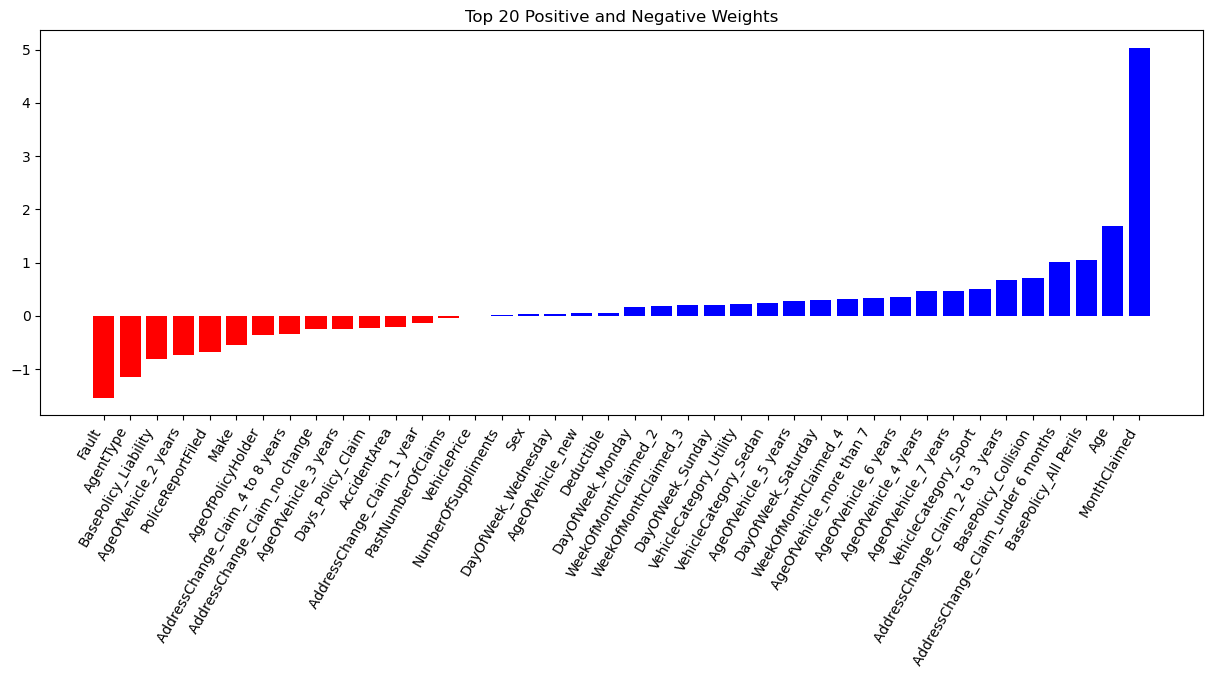

In [169]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title("Top 20 Positive and Negative Weights")
    plt.show()

plot_coefficients(SVC_model_1, SVC_model_1.feature_names_in_)

In [170]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [171]:
final_df.describe()

,Deductible,Age,Sex,NumberOfSuppliments,AgentType,AccidentArea,PoliceReportFiled,AgeOfPolicyHolder,VehiclePrice,MonthClaimed,...,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months
count,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,...,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000
mean,0.269685,0.385943,0.839735,1.982450,0.015894,0.897616,0.027748,3.995563,1.213576,0.083658,...,0.089868,0.228344,0.384570,0.263576,0.003642,0.010993,0.018940,0.040795,0.929007,0.000265
std,0.110978,0.192336,0.366864,1.112767,0.125070,0.303163,0.164256,1.213232,1.775353,0.005164,...,0.286001,0.419780,0.486509,0.440587,0.060244,0.104275,0.136319,0.197821,0.256822,0.016274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.234375,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.080596,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.250000,0.359375,1.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.084172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.250000,0.515625,1.000000,3.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.088543,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,7.000000,5.000000,0.091126,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.2.6 Hyperparameter Tuning for Random Forest

##### Hyperparameter Tuning

In [172]:
num_eval = 100

RF_param_hyperopt = {
    'warm_start' : hp.choice('warm_start', [True, False]),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'bootstrap': True,
    'max_features': hp.choice('max_features', ["sqrt", "log2", None]),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'max_samples': scope.int(hp.quniform('max_samples', 1, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'class_weight':'balanced'
}

In [173]:
load = True
if(load == False):
    RF_hyperopt1 = hyperopt(RF_param_hyperopt,  num_eval, RandomForestClassifier)
    save_file('TuningFS/RF_hyperopt1.pkl', RF_hyperopt1)
else:
    try:
        RF_hyperopt1 = load_file('TuningFS/RF_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [174]:
RF_hyperopt1[1]

{'criterion': 0,
 'max_depth': 20.0,
 'max_features': 2,
 'max_samples': 20.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 7.0,
 'n_estimators': 420.0,
 'warm_start': 1}

In [175]:
trials = RF_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [176]:
bayesTrialsData.sort_values(by='loss')

,loss,criterion,max_depth,max_features,max_samples,min_samples_leaf,min_samples_split,n_estimators,warm_start
81,-0.357878,[0],[20.0],[2],[20.0],[1.0],[7.0],[420.0],[1]
72,-0.355058,[0],[15.0],[2],[15.0],[1.0],[6.0],[380.0],[1]
83,-0.349668,[1],[9.0],[2],[20.0],[2.0],[10.0],[400.0],[1]
75,-0.347698,[0],[10.0],[2],[16.0],[1.0],[6.0],[340.0],[1]
76,-0.344394,[0],[20.0],[2],[18.0],[1.0],[7.0],[340.0],[1]
...,...,...,...,...,...,...,...,...,...
60,-0.000000,[0],[9.0],[1],[6.0],[9.0],[5.0],[240.0],[1]
10,-0.000000,[0],[18.0],[0],[6.0],[17.0],[7.0],[180.0],[1]
13,-0.000000,[1],[13.0],[1],[7.0],[12.0],[19.0],[520.0],[1]
91,-0.000000,[1],[17.0],[2],[18.0],[10.0],[8.0],[360.0],[0]


In [177]:
rf_chosen = RF_hyperopt1[1]


rf_model_1   =   RandomForestClassifier(warm_start=[True, False][rf_chosen['warm_start']],
                                  criterion=["gini", "entropy"][rf_chosen['criterion']],
                                  bootstrap = True,
                                  max_features = ["sqrt", "log2", None][rf_chosen['max_features']],
                                  max_depth = int(rf_chosen['max_depth']),
                                  max_samples = int(rf_chosen['max_samples']),
                                  min_samples_split = int(rf_chosen['min_samples_split']),
                                  min_samples_leaf=int(rf_chosen['min_samples_leaf']),
                                  n_estimators = int(rf_chosen['n_estimators']),
                                  class_weight = 'balanced',
                                  random_state=19)

In [178]:
rf_model_1

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       max_samples=20, min_samples_split=7, n_estimators=420,
                       random_state=19)

##### Model without tuning

In [179]:
train_model(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  87    2]]
TN: 1421, FP: 0, FN: 87, TP: 2


Precision:  1.0
Recall:  0.02247191011235955
F2:  0.02793296089385475
G-Mean:  0.14990633779917228


##### Model without tuning but with imbalance handling

In [180]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1254  167]
 [  60   29]]
TN: 1254, FP: 167, FN: 60, TP: 29


Precision:  0.14795918367346939
Recall:  0.3258426966292135
F2:  0.26268115942028986
G-Mean:  0.5362357013069076


(0.14795918367346939,
 0.3258426966292135,
 0.26268115942028986,
 0.5362357013069076)

##### Model with tuning 

In [181]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,rf_model_1)

Confusion Matrix: 
 [[767 654]
 [ 12  77]]
TN: 767, FP: 654, FN: 12, TP: 77


Precision:  0.10533515731874145
Recall:  0.8651685393258427
F2:  0.35418583256669733
G-Mean:  0.683362278725689


(0.10533515731874145,
 0.8651685393258427,
 0.35418583256669733,
 0.683362278725689)

In [182]:
feature_weight_rf = rf_model_1.feature_importances_

In [183]:
weight_df_rf = pd.DataFrame(feature_weight_rf,index = x_var, columns=['weights'])

In [184]:
weight_df_rf.sort_values('weights', ascending=False)

,weights
BasePolicy_Liability,1.203467e-01
Fault,1.136175e-01
VehicleCategory_Sport,6.861304e-02
BasePolicy_All Perils,6.850674e-02
VehicleCategory_Sedan,6.589266e-02
MonthClaimed,6.472663e-02
Age,6.064351e-02
Make,5.352792e-02
WeekOfMonthClaimed_2,2.392106e-02
AgeOfVehicle_7 years,2.160188e-02


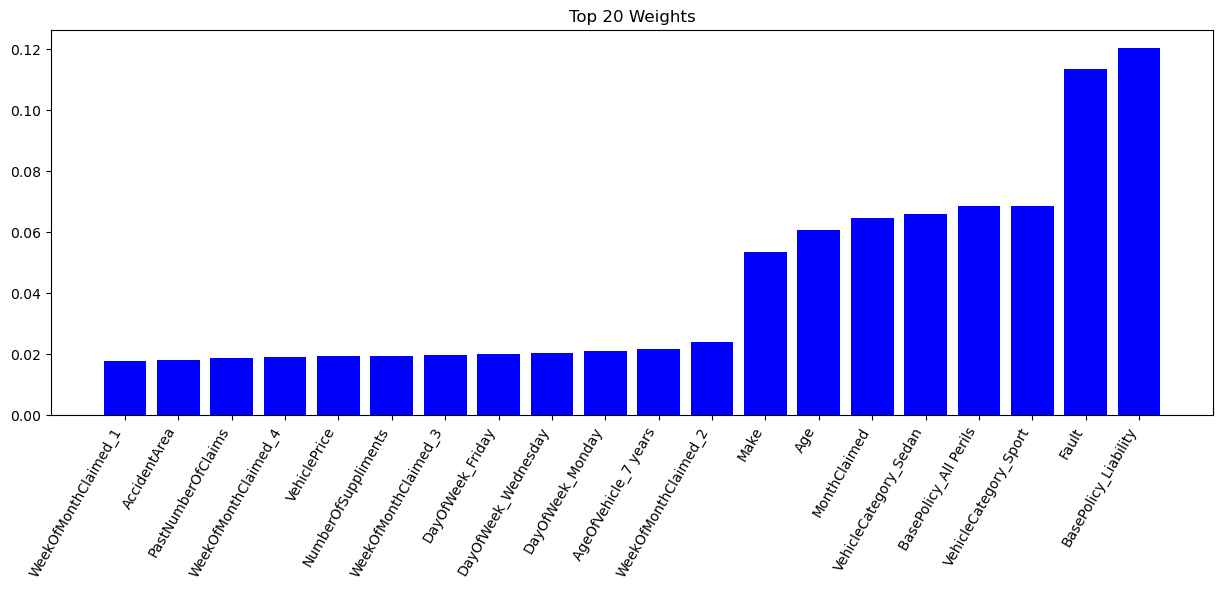

In [185]:
plot_coefficients_trees(weight_df_rf['weights'], weight_df_rf.index)

In [186]:
rf_model_1.feature_importances_

array([4.32000858e-03, 6.06435064e-02, 6.15553769e-03, 1.93271162e-02,
       0.00000000e+00, 1.78685813e-02, 5.25034271e-04, 1.36600384e-02,
       1.91725716e-02, 6.47266297e-02, 1.86775589e-02, 8.53300480e-04,
       5.35279182e-02, 1.13617478e-01, 2.00102649e-02, 2.07832755e-02,
       1.61399187e-02, 1.55078262e-02, 1.47240671e-02, 1.34070324e-02,
       2.02603199e-02, 1.77949027e-02, 2.39210569e-02, 1.97558949e-02,
       1.88864013e-02, 7.75359319e-03, 6.85067353e-02, 1.22844736e-02,
       1.20346706e-01, 6.58926568e-02, 6.86130384e-02, 1.21560045e-03,
       1.87366294e-18, 0.00000000e+00, 1.31340704e-03, 4.77387619e-03,
       7.26041144e-03, 2.16018835e-02, 1.35079524e-02, 0.00000000e+00,
       1.00457529e-03, 1.82005613e-03, 1.59409119e-03, 8.24470298e-03,
       0.00000000e+00])

#### 5.2.7 Hyperparameter Tuning for AdaBoost

##### Hyperparmeter Tuning

In [187]:
num_eval = 100

ADA_param_hyperopt = {
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
}

In [188]:
load = True
if(load == False):
    ADA_hyperopt1 = hyperopt(ADA_param_hyperopt,  num_eval, AdaBoostClassifier)
    save_file('TuningFS/ADA_hyperopt1.pkl', ADA_hyperopt1)
else:
    try:
        ADA_hyperopt1 = load_file('TuningFS/ADA_hyperopt1.pkl')
    except Exception as e:
        print(e)

In [189]:
ADA_hyperopt1[1]

{'learning_rate': 0.2052718535140969, 'n_estimators': 60.0}

In [190]:
trials = ADA_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [191]:
bayesTrialsData.sort_values(by='loss')

,loss,learning_rate,n_estimators
51,-0.390149,[0.2052718535140969],[60.0]
26,-0.389538,[0.22222673465497988],[60.0]
90,-0.388216,[0.196414061791444],[60.0]
20,-0.387305,[0.1300363427565348],[60.0]
70,-0.386696,[0.07659150577538429],[120.0]
...,...,...,...
59,-0.297619,[0.4653623992219313],[300.0]
17,-0.295154,[0.40026932352184014],[420.0]
10,-0.293321,[0.4044873534565836],[440.0]
0,-0.283019,[0.4257717452698156],[520.0]


In [192]:
ada_chosen = ADA_hyperopt1[1]


ada_model_1   =   AdaBoostClassifier(learning_rate=ada_chosen['learning_rate'],
                                    n_estimators = int(ada_chosen['n_estimators']),
                                    random_state=19)

In [193]:
ada_model_1

AdaBoostClassifier(learning_rate=0.2052718535140969, n_estimators=60,
                   random_state=19)

##### Model without tuning 

In [194]:
train_model(X_train, X_test, y_train, y_test, AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1413    8]
 [  85    4]]
TN: 1413, FP: 8, FN: 85, TP: 4


Precision:  0.3333333333333333
Recall:  0.0449438202247191
F2:  0.05434782608695652
G-Mean:  0.21140197206119882


##### Model without tuning but with imbalance handling

In [195]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,AdaBoostClassifier(random_state=19))

Confusion Matrix: 
 [[1044  377]
 [  32   57]]
TN: 1044, FP: 377, FN: 32, TP: 57


Precision:  0.1313364055299539
Recall:  0.6404494382022472
F2:  0.36075949367088606
G-Mean:  0.6859550139245151


(0.1313364055299539,
 0.6404494382022472,
 0.36075949367088606,
 0.6859550139245151)

##### Model with tuning 

In [196]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,ada_model_1)

Confusion Matrix: 
 [[840 581]
 [ 10  79]]
TN: 840, FP: 581, FN: 10, TP: 79


Precision:  0.11969696969696969
Recall:  0.8876404494382022
F2:  0.3887795275590551
G-Mean:  0.7243711522212669


(0.11969696969696969,
 0.8876404494382022,
 0.3887795275590551,
 0.7243711522212669)

In [197]:
feature_weight_ada = ada_model_1.feature_importances_

In [198]:
weight_df_ada = pd.DataFrame(feature_weight_ada,index = x_var, columns=['weights'])

In [199]:
weight_df_ada.sort_values('weights', ascending=False)

,weights
Fault,0.183333
BasePolicy_Liability,0.150000
BasePolicy_All Perils,0.083333
MonthClaimed,0.083333
Make,0.083333
AddressChange_Claim_2 to 3 years,0.050000
DayOfWeek_Wednesday,0.050000
DayOfWeek_Friday,0.050000
DayOfWeek_Thursday,0.033333
AccidentArea,0.033333


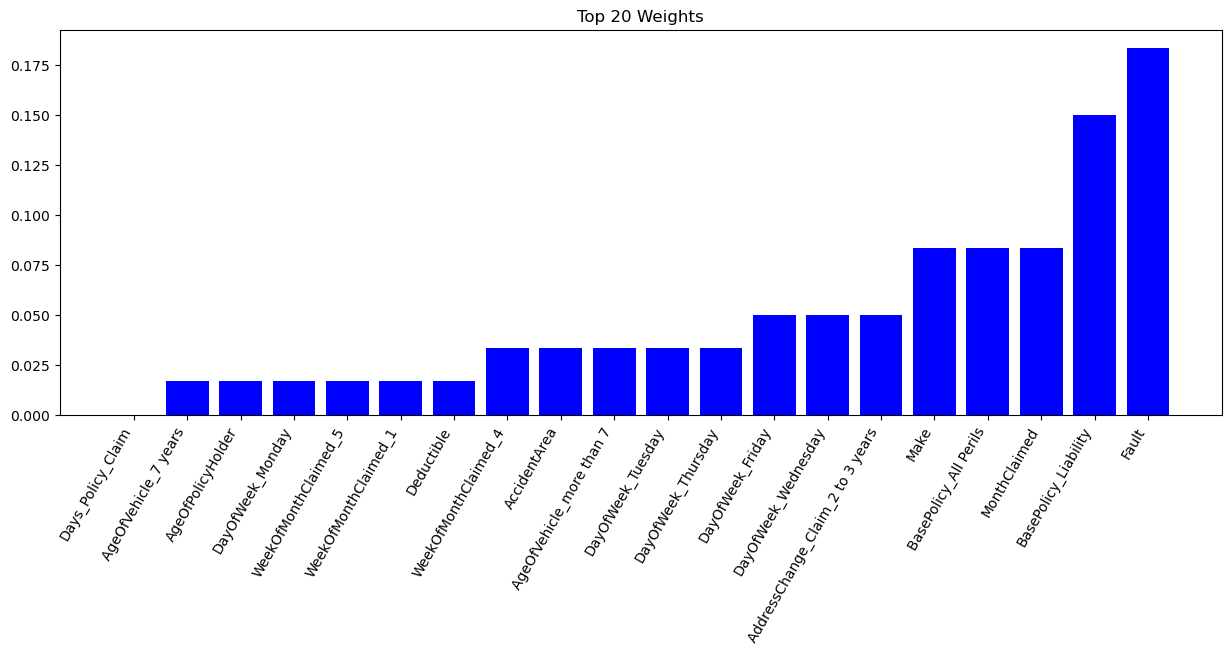

In [200]:
plot_coefficients_trees(weight_df_ada['weights'], weight_df_ada.index)

#### 5.2.8 Voting Classifier with tuned models

##### Model Without Tuning

In [201]:
vc1 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [202]:
train_model(X_train, X_test, y_train, y_test, vc1)

Confusion Matrix: 
 [[1421    0]
 [  89    0]]
TN: 1421, FP: 0, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


##### Model without tuning but with imbalance handling

In [203]:
vc2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
                ('RF',RandomForestClassifier(random_state=19)),
                ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [204]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc2)

Confusion Matrix: 
 [[1017  404]
 [  25   64]]
TN: 1017, FP: 404, FN: 25, TP: 64


Precision:  0.13675213675213677
Recall:  0.7191011235955056
F2:  0.3883495145631068
G-Mean:  0.7173951250492968


(0.13675213675213677,
 0.7191011235955056,
 0.3883495145631068,
 0.7173951250492968)

##### Model with Tuning

In [205]:
vc3 = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),
                ('LR',LR_model_1),
                ('LinearSVC', SVC_model_1),
                ('RF',rf_model_1),
                ('Ada',ada_model_1)],                
    voting='hard'
)

In [206]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc3)

Confusion Matrix: 
 [[818 603]
 [  5  84]]
TN: 818, FP: 603, FN: 5, TP: 84


Precision:  0.1222707423580786
Recall:  0.9438202247191011
F2:  0.4026845637583893
G-Mean:  0.7370963363238036


(0.1222707423580786,
 0.9438202247191011,
 0.4026845637583893,
 0.7370963363238036)

In [207]:
vc3

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=0.19151572699658645,
                                            colsample_bynode=0.6329283822987078,
                                            colsample_bytree=0.3865791309646543,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=16.60120812043403,
                                            grow_policy=None,
                                            imp...
                              LinearSVC(C=5.515706706142934,
                                        class_weight='balanced',
                                        fit_intercept=False, max_iter=601,
                                        random_state=19,
                                        tol=7.414036053743112e-05)),
                             ('RF',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     max_features=None,
                                                     max_samples=20,
                                                     min_samples_split=7,
                                                     n_estimators=420,
                                                     random_state=19)),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.2052718535140969,
                                                 n_estimators=60,
                                                 random_state=19))])

In [208]:
vc_trees = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),
                ('RF',rf_model_1),
                ('Ada',ada_model_1)],                
    voting='hard'
)

In [209]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc_trees)

Confusion Matrix: 
 [[805 616]
 [  5  84]]
TN: 805, FP: 616, FN: 5, TP: 84


Precision:  0.12
Recall:  0.9438202247191011
F2:  0.3977272727272727
G-Mean:  0.7312157561101423


(0.12, 0.9438202247191011, 0.3977272727272727, 0.7312157561101423)

## 6. Active Learning
Train Test Split -> Define model and active learning parameters -> Implement query strategy -> Get uncertainity scores -> Select data points to "label" -> Rerun until number of iterations reached

### Train Test Split

Further split train into labelled and unlabelled portions

In [210]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

from sklearn.model_selection import train_test_split

# Split into train test set, then split into labelled and unlabelled (simulate)

X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

# X_train_labelled, X_train_unlabelled, y_labelled, y_unlabelled = train_test_split(X, y, test_size=0.98, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)
# X_train_labelled, X_train_unlabelled, y_labelled, y_unlabelled = train_test_split(X_train, y_train, test_size=0.9, stratify=y_train)

### Helper Functions

Define ML model and perform imbalanced dataset handling

In [211]:
from collections import Counter
from scipy.stats import entropy
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    cm = confusion_matrix(y_test, y_pred)
    # Evaluation Statistics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    return precision, recall, f2, cm

def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote


def get_sample_SMOTEENN(X_train, y_train, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

def ensemble_predict(clf_list, X):
    """
    Make predictions using an ensemble of classifiers and return the average probability scores.
    """
    predictions = [clf.predict_proba(X) for clf in clf_list]
    average_predictions = np.mean(predictions, axis=0)
    return average_predictions

def vote_proba(clf_list, X):
    n_samples = X.shape[0]
    n_learners = len(clf_list)
    n_classes = 2 # Binary classification 
    proba = np.zeros(shape=(n_samples, n_learners, n_classes))
    for learner_idx, learner in enumerate(clf_list):
        proba[:, learner_idx, :] = learner.predict_proba(X)
    return proba

def vote_actual(clf_list, X):
    prediction = np.zeros(shape=(X.shape[0], len(clf_list)))
    for learner_idx, learner in enumerate(clf_list):
        prediction[:, learner_idx] = learner.predict(X)
    return prediction

def active_learn(X_train, X_val, X_test, y_train, y_val, y_test, sampling_rate, clf_lst, method, strategy):
    # AL Parameters
    num_iterations = 10
    increment = 0.02
    initial_size = 0.10
    batch_size = int(increment * len(X_train)) 

    # Store Performance Statistics
    prec_lst, f2_lst, recall_lst, iteration_lst, lable_rate_lst, cm_lst = [], [], [], [], [], []

    # Define resampling method
    sampling_process = get_sample_SMOTE if method == "SMOTE" else get_sample_SMOTEENN

    # Get initial performance
    X_train_labelled, X_train_unlabelled, y_train_labelled, y_train_unlabelled = train_test_split(X_train, y_train, test_size=1-initial_size, random_state=19, stratify=y_train)
    X_res, y_res = sampling_process(X_train_labelled, y_train_labelled, sampling_rate)
    for clf in clf_lst:
        clf.fit(X_res, y_res.values.ravel())

    # Predict for single model
    if len(clf_lst) == 1:
        y_preds = clf_lst[0].predict(X_test)
    # Predict for multiple models
    else:
        y_preds = np.argmax(ensemble_predict(clf_lst, X_test), axis=1)
    
    # Store initial results
    precision, recall, f2, cm = evaluate_results(y_test, y_preds)
    prec_lst.append(precision)
    recall_lst.append(recall)
    f2_lst.append(f2)
    cm_lst.append(cm) 
    iteration_lst.append(0)
    lable_rate_lst.append(initial_size)

    # Set random seed for consistency
    np.random.seed(19)

    # Repeat process for each iteration
    for iteration in range(num_iterations):
        # Single classifier 
        if len(clf_lst) == 1:
            probabilities = clf_lst[0].predict_proba(X_train_unlabelled)
            if strategy == 'Least_Confident':
                scores = 1-np.max(probabilities, axis=1)
            elif strategy == 'Max_Margin':
                scores = np.max(probabilities, axis=1) - np.partition(probabilities, -2, axis=1)[:, -2]
            elif strategy == 'Entropy': 
                scores = np.transpose(entropy(np.transpose(probabilities)))
                scores = -np.sum(probabilities * np.log(probabilities), axis=1)
            else:
                scores = np.random.rand(len(X_train_unlabelled))
        else:
        # Committee of classifier    
            probabilities = ensemble_predict(clf_lst, X_train_unlabelled)
            if strategy == 'Variance':
                scores = np.var(probabilities, axis=1)
            elif strategy == 'Entropy':
                scores = np.transpose(entropy(np.transpose(probabilities)))
            elif strategy == 'Vote_Entropy':
                votes = vote_actual(clf_lst, X_train_unlabelled)
                n_learners = len(clf_lst)
                p_vote = np.zeros(shape=(X_train_unlabelled.shape[0], 2))
                for vote_idx, vote in enumerate(votes):
                    vote_counter = Counter(vote)
                    for class_idx, class_label in enumerate(clf_lst[0].classes_):
                        p_vote[vote_idx, class_idx] = vote_counter[class_label]/n_learners
                scores = entropy(p_vote, axis=1)
            elif strategy == 'KL_Disagreement':
                p_vote = vote_proba(clf_lst, X_train_unlabelled)
                p_consensus = np.mean(p_vote, axis=1)
                learner_KL_div = np.zeros(shape=(X_train_unlabelled.shape[0], len(clf_lst)))
                for learner_idx, _ in enumerate(clf_lst):
                    learner_KL_div[:, learner_idx] = entropy(np.transpose(p_vote[:, learner_idx, :]), qk=np.transpose(p_consensus))
                scores = np.max(learner_KL_div, axis=1)
            else:
                scores = np.random.rand(len(X_train_unlabelled))

        query_indices = X_train_unlabelled.index[np.argsort(scores)[-batch_size:]]

        # Simulate labelling process
        to_label = X_train_unlabelled.loc[query_indices]
        new_labels = y_train_unlabelled.loc[query_indices]

        # Update dataframes for labelled and non labelled data
        X_train_labelled = pd.concat([X_train_labelled, to_label], ignore_index=True)
        X_train_unlabelled = X_train_unlabelled.drop(query_indices)
        y_train_labelled = pd.concat([y_train_labelled, new_labels], ignore_index=True)
        y_train_unlabelled = y_train_unlabelled.drop(query_indices)

        # Evaluate new model performance
        X_res_smote, y_res_smote = sampling_process(X_train_labelled, y_train_labelled, sampling_rate)
        for clf in clf_lst:
            clf.fit(X_res_smote, y_res_smote.values.ravel())
        # Predict for single model
        if len(clf_lst) == 1:
            y_preds = clf_lst[0].predict(X_test)
        # Predict for multiple models
        else:
            y_preds = np.argmax(ensemble_predict(clf_lst, X_test), axis=1)
        precision, recall, f2, cm = evaluate_results(y_test, y_preds)
        prec_lst.append(precision)
        recall_lst.append(recall)
        f2_lst.append(f2)
        cm_lst.append(cm)
        iteration_lst.append(iteration+1)
        lable_rate_lst.append(round(len(X_train_labelled) / len(X_train), 2))
    
    # Store performance statistics
    df = pd.DataFrame(columns=['Precision','Recall', 'F2 Score'])
    df['Precision'] = prec_lst
    df['Recall'] = recall_lst
    df['F2 Score'] = f2_lst
    df['Iterations'] = iteration_lst
    df['Label Percentage'] = lable_rate_lst
    df['Confusion Matrices'] = cm_lst
    
    return df

In [212]:
clf_lst = [SVC(random_state=19,probability=True), LogisticRegression(random_state=19, max_iter=1000), XGBClassifier(random_state=19)]

### Single Classifier

,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.124016,0.707865,0.364583,0,0.10,"[[976, 445], [26, 63]]"
1,0.125926,0.764045,0.379464,1,0.12,"[[949, 472], [21, 68]]"
2,0.133568,0.853933,0.410811,2,0.14,"[[928, 493], [13, 76]]"
3,0.124161,0.831461,0.388655,3,0.16,"[[899, 522], [15, 74]]"
4,0.126667,0.853933,0.397490,4,0.18,"[[897, 524], [13, 76]]"
5,0.124183,0.853933,0.392562,5,0.20,"[[885, 536], [13, 76]]"
6,0.125612,0.865169,0.397317,6,0.22,"[[885, 536], [12, 77]]"
7,0.124370,0.831461,0.389064,7,0.24,"[[900, 521], [15, 74]]"
8,0.127517,0.853933,0.399160,8,0.26,"[[901, 520], [13, 76]]"
9,0.129252,0.853933,0.402542,9,0.28,"[[909, 512], [13, 76]]"


Strategy:  Least_Confident
Confusion Matrix: 
 [[918 503]
 [ 14  75]]
TN: 918, FP: 503, FN: 14, TP: 75




,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.124016,0.707865,0.364583,0,0.10,"[[976, 445], [26, 63]]"
1,0.125926,0.764045,0.379464,1,0.12,"[[949, 472], [21, 68]]"
2,0.133568,0.853933,0.410811,2,0.14,"[[928, 493], [13, 76]]"
3,0.124161,0.831461,0.388655,3,0.16,"[[899, 522], [15, 74]]"
4,0.126667,0.853933,0.397490,4,0.18,"[[897, 524], [13, 76]]"
5,0.124183,0.853933,0.392562,5,0.20,"[[885, 536], [13, 76]]"
6,0.125612,0.865169,0.397317,6,0.22,"[[885, 536], [12, 77]]"
7,0.124370,0.831461,0.389064,7,0.24,"[[900, 521], [15, 74]]"
8,0.127517,0.853933,0.399160,8,0.26,"[[901, 520], [13, 76]]"
9,0.129252,0.853933,0.402542,9,0.28,"[[909, 512], [13, 76]]"


Strategy:  Entropy
Confusion Matrix: 
 [[918 503]
 [ 14  75]]
TN: 918, FP: 503, FN: 14, TP: 75




,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.124016,0.707865,0.364583,0,0.10,"[[976, 445], [26, 63]]"
1,0.133721,0.775281,0.395642,1,0.12,"[[974, 447], [20, 69]]"
2,0.126629,0.764045,0.380739,2,0.14,"[[952, 469], [21, 68]]"
3,0.125000,0.775281,0.379956,3,0.16,"[[938, 483], [20, 69]]"
4,0.124126,0.797753,0.382543,4,0.18,"[[920, 501], [18, 71]]"
5,0.122807,0.786517,0.377970,5,0.20,"[[921, 500], [19, 70]]"
6,0.120482,0.786517,0.373533,6,0.22,"[[910, 511], [19, 70]]"
7,0.117647,0.764045,0.364026,7,0.24,"[[911, 510], [21, 68]]"
8,0.117338,0.752809,0.361381,8,0.26,"[[917, 504], [22, 67]]"
9,0.121053,0.775281,0.372570,9,0.28,"[[920, 501], [20, 69]]"


Strategy:  Random
Confusion Matrix: 
 [[913 508]
 [ 18  71]]
TN: 913, FP: 508, FN: 18, TP: 71




<Axes: title={'center': 'Uncertainty Sampling Performance'}, xlabel='Iterations', ylabel='F2 Score'>

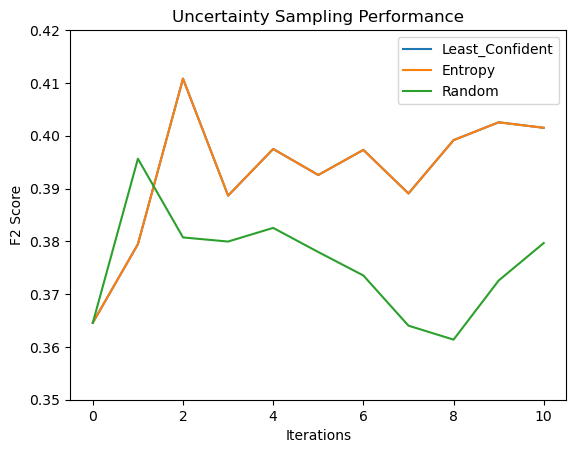

In [213]:
strategies = ['Least_Confident', 'Entropy', 'Random']

df = pd.DataFrame(columns=strategies) 

for strategy in strategies:
    performance = active_learn(X_train, X_val, X_test, y_train, y_val, y_test, sampling_rate=0.6, clf_lst=[clf_lst[1]], method='SMOTEENN', strategy=strategy)
    display(performance)
    df[strategy] = performance['F2 Score']
    df['Iterations'] = performance['Iterations']
    cm = performance['Confusion Matrices'].to_list()[-1]
    TN, FP, FN, TP = cm.ravel()
    print('Strategy: ', strategy)
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

df.plot(x='Iterations',
        y=strategies,
        title= 'Uncertainty Sampling Performance',
        ylabel= 'F2 Score',
            ylim=(0.35,0.42))

### Multiple Classifiers (Query By Committee)

,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.122353,0.584270,0.332907,0,0.10,"[[1048, 373], [37, 52]]"
1,0.126882,0.662921,0.359318,1,0.12,"[[1015, 406], [30, 59]]"
2,0.126386,0.640449,0.353160,2,0.14,"[[1027, 394], [32, 57]]"
3,0.123482,0.685393,0.358824,3,0.16,"[[988, 433], [28, 61]]"
4,0.118644,0.629213,0.338164,4,0.18,"[[1005, 416], [33, 56]]"
5,0.113537,0.584270,0.319410,5,0.20,"[[1015, 406], [37, 52]]"
6,0.120087,0.617978,0.337838,6,0.22,"[[1018, 403], [34, 55]]"
7,0.125000,0.640449,0.350985,7,0.24,"[[1022, 399], [32, 57]]"
8,0.124731,0.651685,0.353228,8,0.26,"[[1014, 407], [31, 58]]"
9,0.123482,0.685393,0.358824,9,0.28,"[[988, 433], [28, 61]]"


Strategy:  Variance
Confusion Matrix: 
 [[999 422]
 [ 28  61]]
TN: 999, FP: 422, FN: 28, TP: 61




,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.122353,0.584270,0.332907,0,0.10,"[[1048, 373], [37, 52]]"
1,0.136919,0.629213,0.366013,1,0.12,"[[1068, 353], [33, 56]]"
2,0.137116,0.651685,0.372272,2,0.14,"[[1056, 365], [31, 58]]"
3,0.132029,0.606742,0.352941,3,0.16,"[[1066, 355], [35, 54]]"
4,0.144254,0.662921,0.385621,4,0.18,"[[1071, 350], [30, 59]]"
5,0.139810,0.662921,0.379177,5,0.20,"[[1058, 363], [30, 59]]"
6,0.149367,0.662921,0.392810,6,0.22,"[[1085, 336], [30, 59]]"
7,0.145119,0.617978,0.374150,7,0.24,"[[1097, 324], [34, 55]]"
8,0.154639,0.674157,0.403226,8,0.26,"[[1093, 328], [29, 60]]"
9,0.145833,0.629213,0.378378,9,0.28,"[[1093, 328], [33, 56]]"


Strategy:  Vote_Entropy
Confusion Matrix: 
 [[1103  318]
 [  34   55]]
TN: 1103, FP: 318, FN: 34, TP: 55




,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.122353,0.584270,0.332907,0,0.10,"[[1048, 373], [37, 52]]"
1,0.134078,0.539326,0.336134,1,0.12,"[[1111, 310], [41, 48]]"
2,0.139726,0.573034,0.353675,2,0.14,"[[1107, 314], [38, 51]]"
3,0.142857,0.528090,0.343066,3,0.16,"[[1139, 282], [42, 47]]"
4,0.161716,0.550562,0.371775,4,0.18,"[[1167, 254], [40, 49]]"
5,0.153846,0.584270,0.374640,5,0.20,"[[1135, 286], [37, 52]]"
6,0.154545,0.573034,0.371720,6,0.22,"[[1142, 279], [38, 51]]"
7,0.165663,0.617978,0.399709,7,0.24,"[[1144, 277], [34, 55]]"
8,0.164634,0.606742,0.394737,8,0.26,"[[1147, 274], [35, 54]]"
9,0.160991,0.584270,0.382916,9,0.28,"[[1150, 271], [37, 52]]"


Strategy:  KL_Disagreement
Confusion Matrix: 
 [[1144  277]
 [  36   53]]
TN: 1144, FP: 277, FN: 36, TP: 53




,Precision,Recall,F2 Score,Iterations,Label Percentage,Confusion Matrices
0,0.122353,0.584270,0.332907,0,0.10,"[[1048, 373], [37, 52]]"
1,0.138107,0.606742,0.361446,1,0.12,"[[1084, 337], [35, 54]]"
2,0.125296,0.595506,0.340180,2,0.14,"[[1051, 370], [36, 53]]"
3,0.133758,0.707865,0.380895,3,0.16,"[[1013, 408], [26, 63]]"
4,0.125984,0.719101,0.370370,4,0.18,"[[977, 444], [25, 64]]"
5,0.123791,0.719101,0.366552,5,0.20,"[[968, 453], [25, 64]]"
6,0.122568,0.707865,0.362069,6,0.22,"[[970, 451], [26, 63]]"
7,0.119141,0.685393,0.351382,7,0.24,"[[970, 451], [28, 61]]"
8,0.116142,0.662921,0.341435,8,0.26,"[[972, 449], [30, 59]]"
9,0.118503,0.640449,0.340502,9,0.28,"[[997, 424], [32, 57]]"


Strategy:  Random
Confusion Matrix: 
 [[979 442]
 [ 29  60]]
TN: 979, FP: 442, FN: 29, TP: 60




<Axes: title={'center': 'Disagreement Sampling Performance'}, xlabel='Iterations', ylabel='F2 Score'>

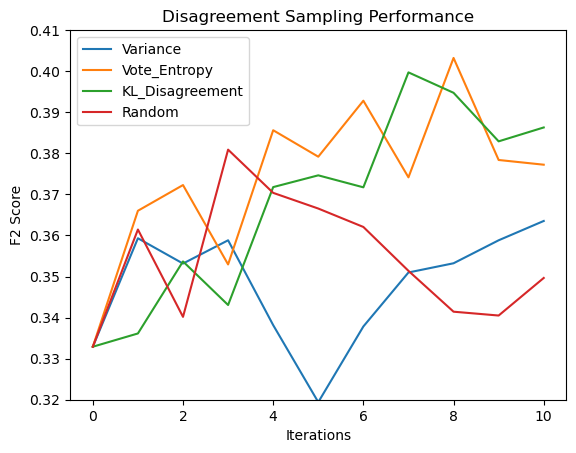

In [214]:
strategies = ['Variance', 'Vote_Entropy', 'KL_Disagreement', 'Random']

df = pd.DataFrame(columns=strategies) 

for strategy in strategies:
    performance = active_learn(X_train, X_val, X_test, y_train, y_val, y_test, sampling_rate=0.7, clf_lst=clf_lst, method='SMOTEENN', strategy=strategy)
    display(performance)
    df[strategy] = performance['F2 Score']
    df['Iterations'] = performance['Iterations']
    print('Strategy: ', strategy)
    cm = performance['Confusion Matrices'].to_list()[-1]
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

df.plot(x='Iterations',
        y=strategies,
        title= 'Disagreement Sampling Performance',
        ylabel='F2 Score',
            ylim=(0.32,0.41))

<Axes: title={'center': 'Labelling Sensitivity Analysis'}, xlabel='Labelled Percentage'>

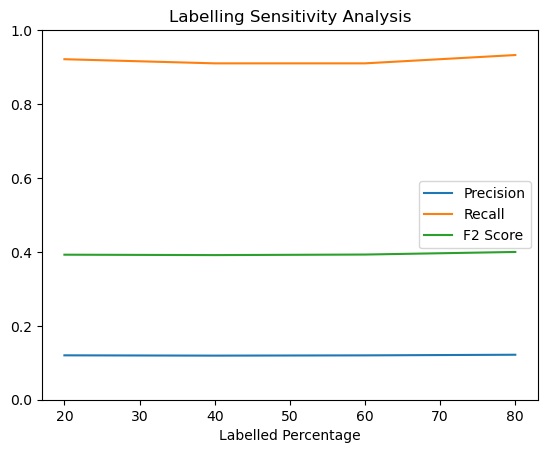

In [215]:
labelled_percentage = [20, 40, 60, 80]
precision = [0.1201, 0.1193, 0.1200, 0.1217]
recall = [0.9213, 0.9101, 0.9101, 0.9326]
f2 = [0.3924, 0.3913, 0.3928, 0.3998]

data = {
    'Labelled Percentage': labelled_percentage,
    'Precision': precision,
    'Recall': recall,
    'F2 Score': f2
}

df = pd.DataFrame(data)
df.plot(x='Labelled Percentage',
        y=['Precision', 'Recall', 'F2 Score'],
        title= 'Labelling Sensitivity Analysis',
            ylim=(0,1))

## 7. Few Shot Learning

### Train Test Split

In [216]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.90, random_state=19,
                                        stratify=final_df[y_var])

In [219]:
y['FraudFound_P'].sum()

89

### Create Pairs for few shot

In [220]:
import random

# Create pairs of data points for Siamese Network
def create_pairs(data, labels):
    data = data.values.tolist()
    labels = labels.values.tolist()
    # Create pairs where one is a positive example and the other is a negative example
    pairs, y = [], []
    for i in range(len(data)):
        for j in range(len(data)):
            pairs.append([data[i], data[j]])
            y.append(int(labels[i] == labels[j]))
    temp = list(zip(pairs, y))
    random.shuffle(temp)
    res1, res2 = zip(*temp)
    # res1 and res2 come out as tuples, and so must be converted to lists.
    pairs, y = list(res1), list(res2)
    return np.array(pairs), np.array(y)

In [221]:
pairs, pair_result = create_pairs(X, y)

In [222]:
print(pair_result[0:10])

[1 0 1 1 1 1 0 1 1 1]


### Siamese Model

In [225]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

# Define the base network (subnetwork)
input_shape = (45,)  # Replace 'your_input_shape' with the correct input shape
# Modify the final layer for binary classification
base_network = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=input_shape),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Final layer with 1 output unit and sigmoid activation
])

# Create the input layers for the two data points
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Encode each data point using the base network
encoded_a = base_network(input_a)
encoded_b = base_network(input_b)

# Define a custom contrastive loss function
def contrastive_loss(y_true, y_pred):
    y_true = tf.cast(y_pred, tf.float32)
    margin = 1.0
    return tf.keras.backend.mean(y_true * tf.keras.backend.square(y_pred) + (1 - y_true) * tf.keras.backend.square(tf.keras.backend.maximum(margin - y_pred, 0)))

# Calculate the similarity score using a Lambda layer
distance = Lambda(lambda embeddings: tf.keras.backend.abs(embeddings[0] - embeddings[1]))([encoded_a, encoded_b])

# Create the Siamese model
siamese_model = Model(inputs=[input_a, input_b], outputs=distance)

# Compile the model with the custom loss function
siamese_model.compile(loss=contrastive_loss, optimizer='adam')


In [226]:
print(siamese_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 45)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 45)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 1)            5569        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['sequential[0][0]',         

In [227]:
# Now you can fit the model with your pairs and labels
# Assuming 'pairs' is your data pairs and 'y' is the corresponding labels (0 for dissimilar, 1 for similar)
# Split your data into training, validation, and test sets

# Split for training and validation 80% training 20% validation
split = int(len(pairs)*(0.8))
train_pairs = pairs[:split]
train_labels = pair_result[:split]
val_pairs = pairs[split:]
val_labels = pair_result[split:]


In [228]:
# Train the Siamese network
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

siamese_model.fit([train_pairs[:, 0], train_pairs[:, 1]], train_labels,
                  validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels),
                  epochs=30, batch_size=32, callbacks=[earlystopping])

Epoch 1/30
57003/57003 [==============================] - 92s 2ms/step - loss: 0.5016 - val_loss: 0.5009
Epoch 2/30
57003/57003 [==============================] - 88s 2ms/step - loss: 0.5005 - val_loss: 0.5012
Epoch 3/30
57003/57003 [==============================] - 90s 2ms/step - loss: 0.5007 - val_loss: 0.5009
Epoch 4/30
57003/57003 [==============================] - 95s 2ms/step - loss: 0.5005 - val_loss: 0.5011
Epoch 5/30
57003/57003 [==============================] - 86s 2ms/step - loss: 0.5005 - val_loss: 0.5010
Epoch 6/30
57003/57003 [==============================] - 88s 2ms/step - loss: 0.5004 - val_loss: 0.5011


### Test Model

In [229]:
# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix, classification_report

In [230]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))

In [231]:
def test_model(test_pairs, test_labels, store, labels_known, labels_rest):
    # Evaluate the model on the test set
    #test_loss = siamese_model.evaluate([test_pairs[:, 0], test_pairs[:, 1]], test_labels)
    #print("Test loss:", test_loss)
    y_pred = siamese_model.predict([test_pairs[:, 0], test_pairs[:, 1]])
    zeroes_test = np.count_nonzero(test_labels == 0)
    ones_test = np.count_nonzero(test_labels == 1)
    labels_known = labels_known.values.tolist()
    labels_rest = labels_rest.values.tolist()
    # Define a threshold for classification (e.g., 0.5)
    for i in range(10, 50):
        threshold = i/100
        print("\n")
        print(f"Threshold: {threshold}")
        # Convert similarity scores to binary predictions based on the threshold
        y_pred_binary = (y_pred < threshold).astype(int)
        correct_predictions = 1 if y_pred_binary == test_labels else 0
        d = {} #Get amount of 0s and 1s for each unknown data point
        for j in range(len(test_labels)):
            if store[j][1] not in d:
                d[store[j][1]] = []
            if (y_pred_binary[j] == 1): #If 1 means similar
                if labels_known[store[j][0]] == 1: #Means comparing with fraud
                    d[store[j][1]].append(1)
                else:
                    d[store[j][1]].append(0)
            else: #Means not similar
                if labels_known[store[j][0]] == 1: #Means comparing with fraud
                    d[store[j][1]].append(0)
                else:
                    d[store[j][1]].append(1)
        for k,v in d.items():
            if v.count(1) > v.count(0): #Fraud
                d[k] = 1
            else:
                d[k] = 0
        z, o = 0, 0
        tp, tn, fp, fn = 0, 0, 0, 0
        lst_pred = []
        print(len(labels_rest))
        for i in range(len(labels_rest[:len(d)])):
            lst_pred.append(d[i])
        #Compare to actual
        evaluate_results(labels_rest[:len(d)], lst_pred)

In [232]:
#Test on whole dataset with a few known subjects
def create_pairs2(known, rest, labels_known, labels_rest):
    known = known.values.tolist()
    rest = rest.values.tolist()
    labels_known = labels_known.values.tolist()
    labels_rest = labels_rest.values.tolist()
    # Create pairs where one is a positive example and the other is a negative example
    pairs, y = [], []
    storage = []
    for i in range(len(known)):
        for j in range(len(rest)):
            pairs.append([known[i], rest[j]])
            storage.append([i, j]) #Help us know whether the actual result is fraud or not y comparing to known
            y.append(int(labels_known[i] == labels_rest[j]))
    return np.array(pairs), np.array(y), storage

In [233]:
#Test whether we know if rest of dataset is fraud/nonfraud given status of a few data points and comparing
#their similarity
new_pairs, new_labels, store = create_pairs2(X, X_test, y, y_test)
test_model(new_pairs, new_labels, store, y, y_test)



641279/641279 [==============================] - 634s 987us/step


Threshold: 0.1
13590
Confusion Matrix: 
 [[    0 12787]
 [    0   803]]
TN: 0, FP: 12787, FN: 0, TP: 803
Accuracy:  0.05908756438557763
Recall:  1.0
F2:  0.23895964766099276


Threshold: 0.11
13590
Confusion Matrix: 
 [[    0 12787]
 [    0   803]]
TN: 0, FP: 12787, FN: 0, TP: 803
Accuracy:  0.05908756438557763
Recall:  1.0
F2:  0.23895964766099276


Threshold: 0.12
13590
Confusion Matrix: 
 [[    0 12787]
 [    0   803]]
TN: 0, FP: 12787, FN: 0, TP: 803
Accuracy:  0.05908756438557763
Recall:  1.0
F2:  0.23895964766099276


Threshold: 0.13
13590
Confusion Matrix: 
 [[    0 12787]
 [    0   803]]
TN: 0, FP: 12787, FN: 0, TP: 803
Accuracy:  0.05908756438557763
Recall:  1.0
F2:  0.23895964766099276


Threshold: 0.14
13590
Confusion Matrix: 
 [[    0 12787]
 [    0   803]]
TN: 0, FP: 12787, FN: 0, TP: 803
Accuracy:  0.05908756438557763
Recall:  1.0
F2:  0.23895964766099276


Threshold: 0.15
13590
Confusion Matrix: 
 [[    0